# Problem -1: -For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Loading data as a time series object

# 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df = pd.read_csv('Sparkling.csv', parse_dates=['YearMonth'],
                index_col='YearMonth')

In [3]:
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

## Plot the Time Series

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

Text(0.5, 1.0, 'Sparkling Wine sales in the 20th century')

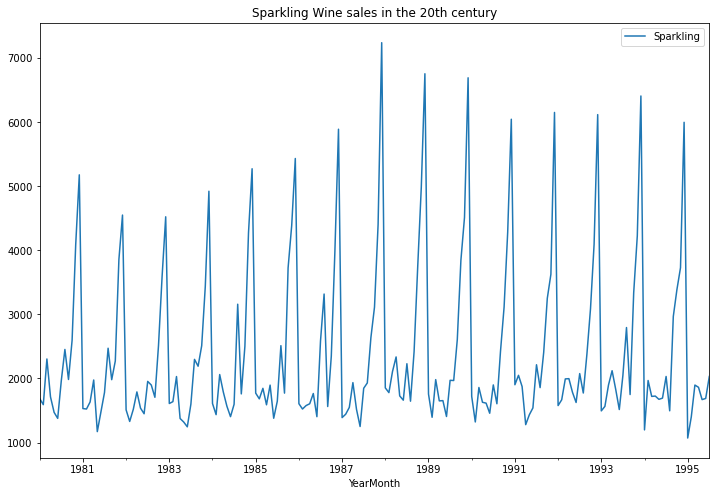

In [5]:
df.plot();
plt.title('Sparkling Wine sales in the 20th century')

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

## Mean and Median of Monthly Sales of Sparking Wine

In [6]:
df.mean()

Sparkling    2402.417112
dtype: float64

In [7]:
print(f'The mean monthly beer production across years is {df.mean().values[0]}')  #df.mean()

The mean monthly beer production across years is 2402.4171122994653


In [8]:
print(f'The median monthly beer production across years is {df.median().values[0]}')  # df.median()

The median monthly beer production across years is 1874.0


In [9]:
df['1991']

Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432
1991-06-01       1540
1991-07-01       2214
1991-08-01       1857
1991-09-01       2408
1991-10-01       3252
1991-11-01       3627
1991-12-01       6153

## Boxplot of Monthly Production for each year 

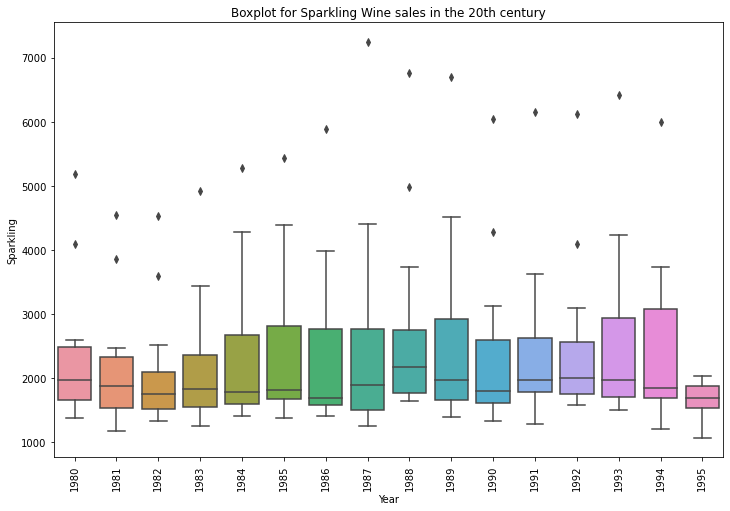

In [10]:
sns.boxplot(x=df.index.year, y=df['Sparkling'])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.title('Boxplot for Sparkling Wine sales in the 20th century');

As we saw in the earlier plot, there is an increasing trend in the initial years upto 1988 after which the sales seems to decrease  till 1990 and then is on a Slight upward  trend.<br> Also there are some years where the hike or drop in Sales is more as seen in the outliers.

Also we can see that there is some yearly seasonality ptresen in the data , We will be double sure of seasonality in subsequent graphs

## Boxplot for each Calendar month across years

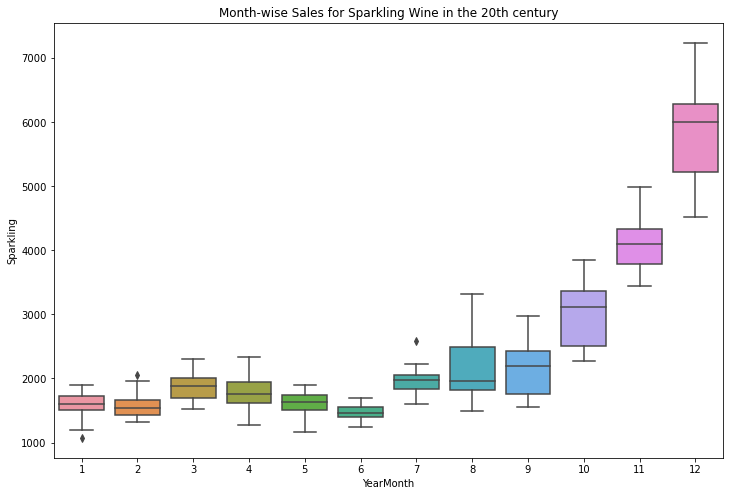

In [11]:
sns.boxplot(x=df.index.month, y=df['Sparkling'])
plt.title('Month-wise Sales for Sparkling Wine in the 20th century');

The boxplot for monthly Sales for each month across years show very few outliers for Jan, Feb & July Months.

This shows that in few years the There is a higher sales in perticular Month.

## `monthplot` of the Time Series

In [12]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

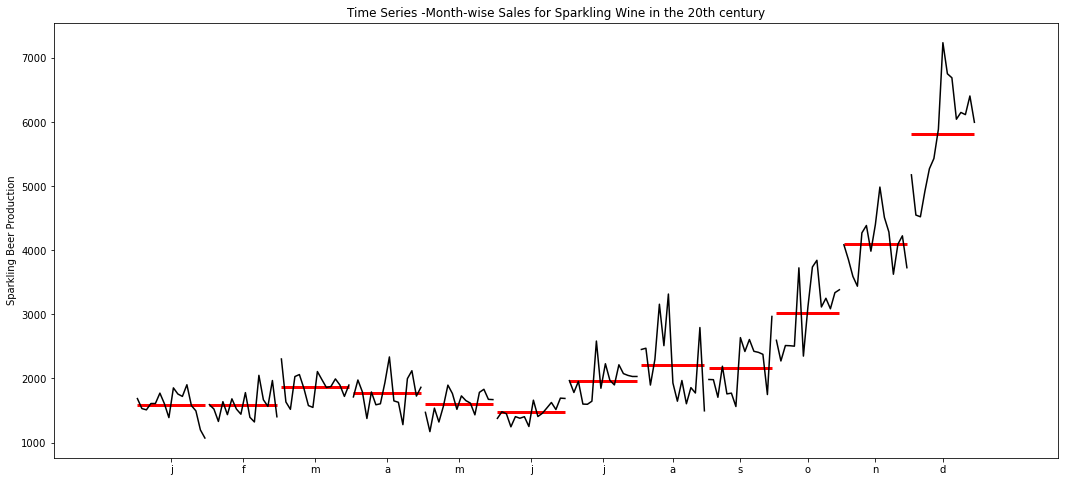

In [13]:
fig,ax = plt.subplots(figsize=(18,8))
month_plot(df, ylabel='Sparkling Beer Production', ax=ax)
plt.title('Time Series -Month-wise Sales for Sparkling Wine in the 20th century');

As we can see that The Sales is Lowest in the month of June and highest in the Month of December .It is also Noticed that year on year wine sales are Incresing trend in Most of the Months (This Might be an illusion so we will test this hypothesis in sebsequent plots)

## Conversion of Monthly Data to other periodicity

Since Our data is given Month-wise to converty this Data in Daily frequency , Quaterly frequency ,  We will use resample method of pandas dataframe.

### Quarterly

In [14]:
df_quarterly_sum = df.resample('Q').sum()

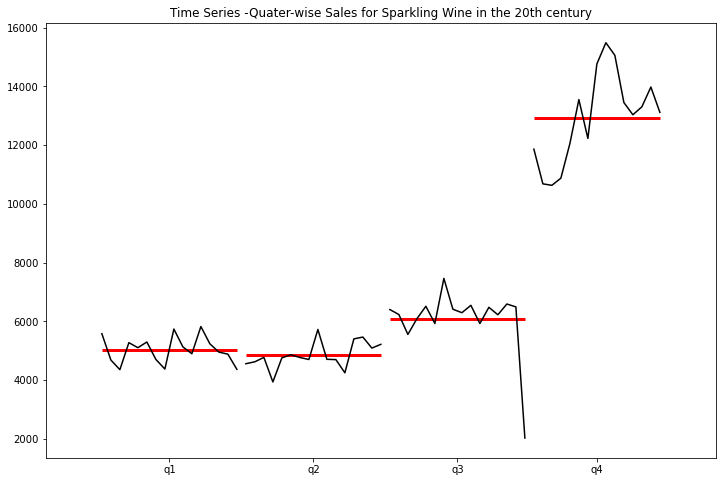

In [15]:
quarter_plot(df_quarterly_sum)
plt.title('Time Series -Quater-wise Sales for Sparkling Wine in the 20th century');

We can see from QTR plot QTR-4 for every year is having higer Wine sales & QTR3 is having 2nd Highest wine sales accross all the years

In [16]:
df_quarterly_sum.head() # column heading is wrong..

Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

In [17]:
df_quarterly_sum.columns = ['Sparkling Quarterly Beer Production']

In [18]:
df_quarterly_sum.head()

Sparkling Quarterly Beer Production
YearMonth                                      
1980-03-31                                 5581
1980-06-30                                 4560
1980-09-30                                 6403
1980-12-31                                11862
1981-03-31                                 4686

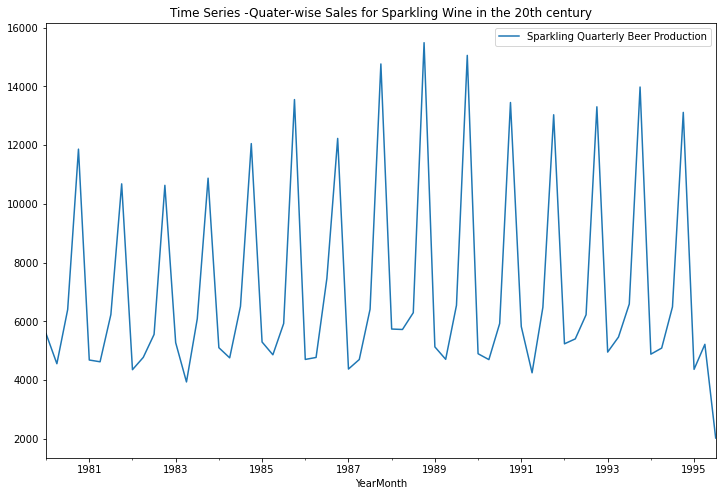

In [19]:
df_quarterly_sum.plot()
plt.title('Time Series -Quater-wise Sales for Sparkling Wine in the 20th century');

As we are Resampling Our data QTR wise the Seasonal pattern will be very clear from the above time series plot  

### Let's look time series  Yearly Plots

In [20]:
df_yearly_sum = df.resample('Y').sum()

In [21]:
df_yearly_sum.head() #column heading is wrong

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

In [22]:
df_yearly_sum.columns = ['Annual Sparkling Wine Sales']

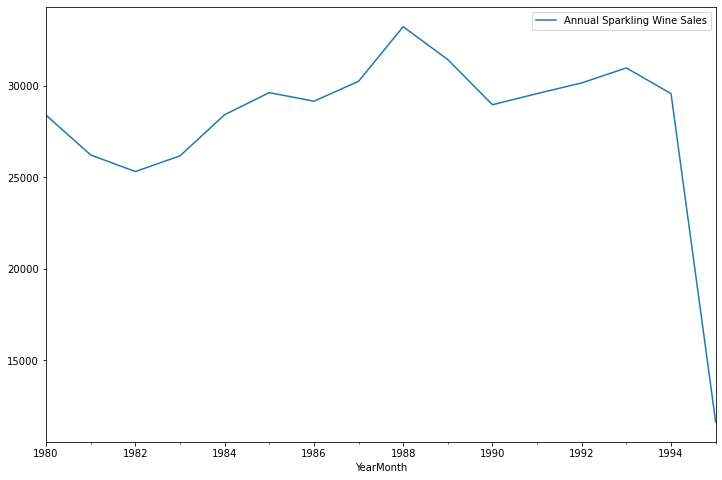

In [23]:
df_yearly_sum.plot();

Yearly time series is having 1988 & after that there is decreasing tend can bee seen

### Average Yearly Wine Sales across years

In [24]:
df_yearly_mean = df.resample('Y').mean()

In [25]:
df_yearly_mean.head() # column header is wrong..

Sparkling
YearMonth              
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

In [26]:
df_yearly_mean.columns = ['Average monthly Sparkling Wine Sales']

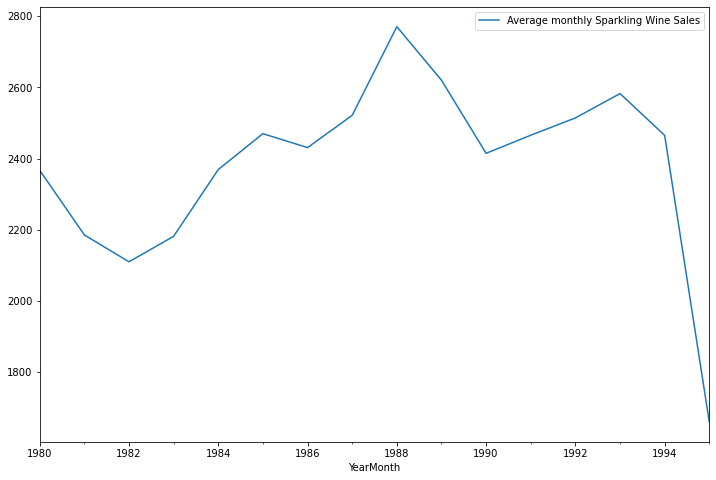

In [27]:
df_yearly_mean.plot();

The resampled annual figures have smoothened out the seasonality variations and we are able to see only the year on year trends in sales (both annual totals as well as monthly average for each year).

### Let's look time series Daily  Plots 

In [28]:
df_daily_sum = df.resample('D').sum()
df_daily_sum.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-01-02          0
1980-01-03          0
1980-01-04          0
1980-01-05          0

Note, that we only have monthly data for each year and we are asking python to give us daily data for each month. Since this is not possible, we are getting the monthly figure for that month assigned to a particular day and for the rest of the days in the month, the value assigned is zero. This is the default behaviour.

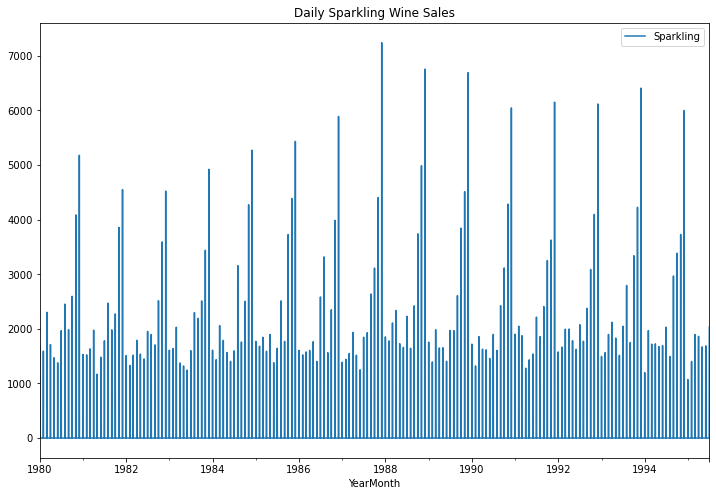

In [29]:
# plotting this is not going to be very useful
df_daily_sum.plot()
plt.title('Daily Sparkling Wine Sales');

These Higher spikes can be seen for the Higer Daily sales 

### Let's look time series plot for  5 years

In [30]:
df_5_sum = df.resample('5Y').sum()
df_5_sum.columns = ['5 years Wine Sales']
df_5_sum.head()

5 years Wine Sales
YearMonth                     
1980-12-31               28406
1985-12-31              135799
1990-12-31              153094
1995-12-31              131953

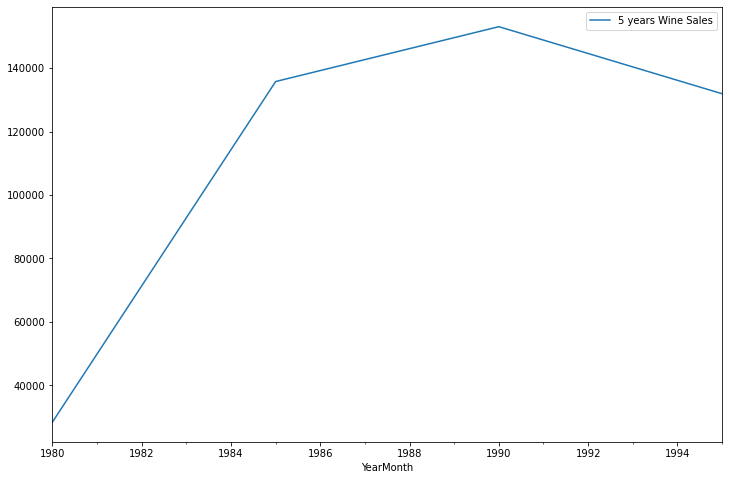

In [31]:
df_5_sum.plot();

### let's look for Decade Sales

In [32]:
df_decade_sum = df.resample('10Y').sum()
df_decade_sum.columns = ['Decade Sparkling Wine Sales']
df_decade_sum.head()

Decade Sparkling Wine Sales
YearMonth                              
1980-12-31                        28406
1990-12-31                       288893
2000-12-31                       131953

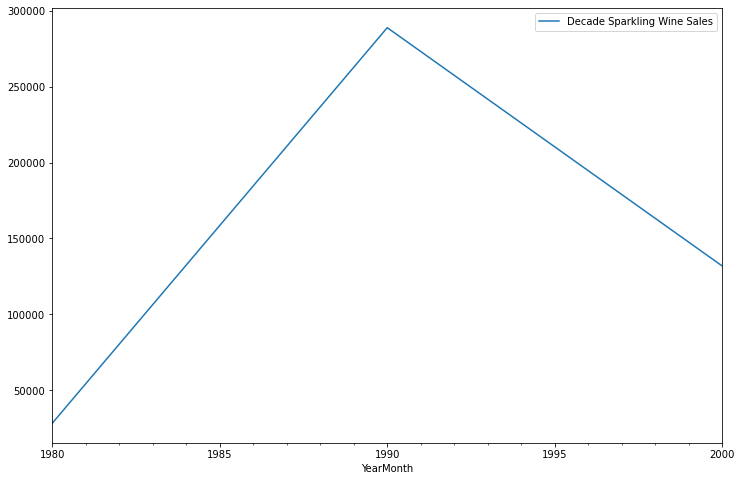

In [33]:
df_decade_sum.plot();

We can see from the Graph that in first decade Wine sales are having incresing Trend but in next decade wine sales are having decresing trend.

# Plot a graph of monthly Wine Sales across years

In [34]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

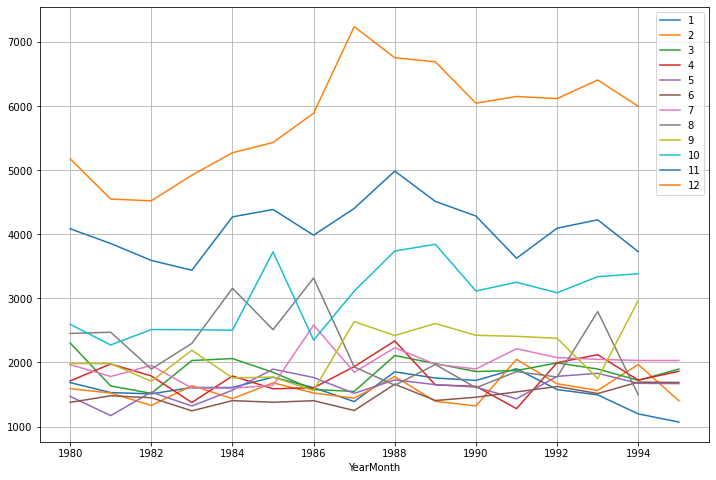

In [35]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

We can see that highest wine sales recorded in the Month of December accoross all years & average lowest sales recorded in the Month of june and july respectively

## Plot the Empirical Cumulative Distribution

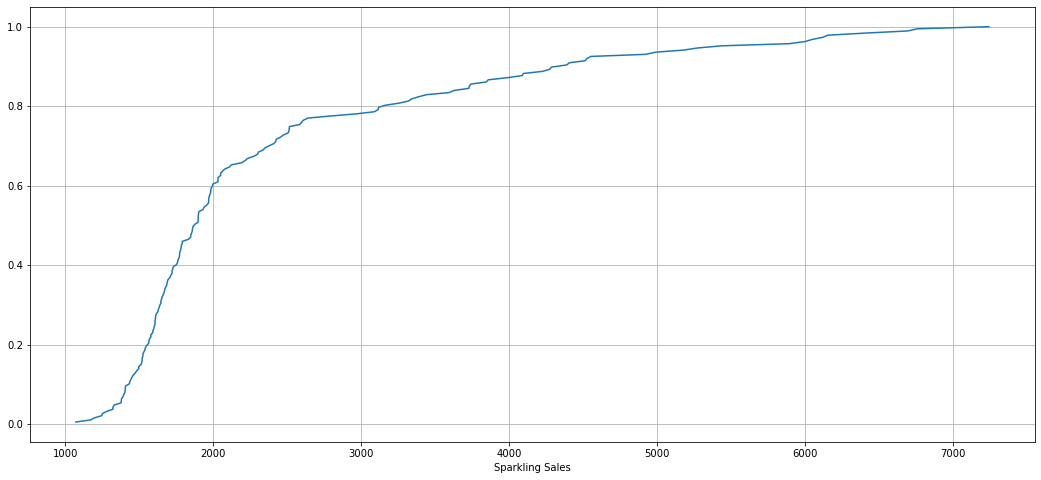

In [36]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.in the above graph 80 % of data points just a little mofre than 3000 unit sales & next 20 % of data points consits of next approx 4000 units of Wine sales

## Plot the average Wine Sales per month and the month on month percentage change of Wine Sales.

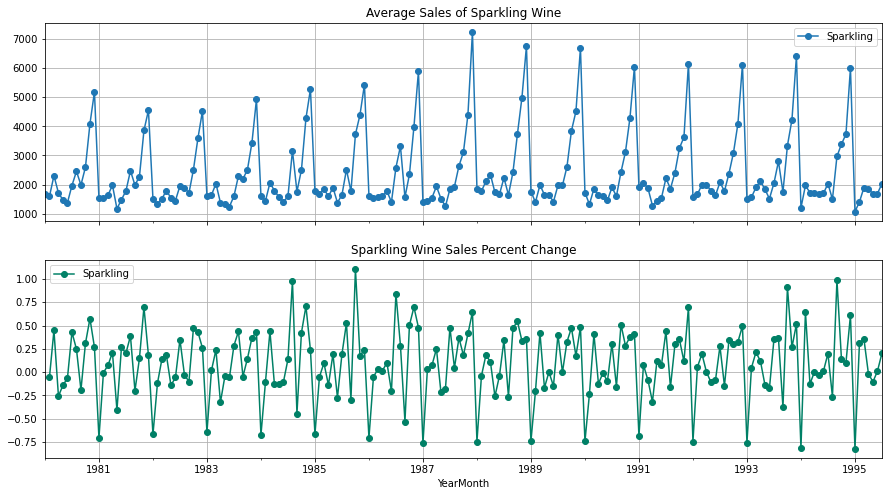

In [37]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales of Sparkling Wine",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Wine Sales Percent Change",grid=True)

As we can see from Graph that in december 1980 the maximum sales is around 5100 & there was approx 60 % change in sales recoded compared to November 1980. In december 1985 the change in Sales from previous month is more than 110% 

The above two graphs tells us the Average 'Wine Sales' and the Percentage change of 'Wine Sales' with respect to the time.

## Time Series Decomposition

### Additive Model

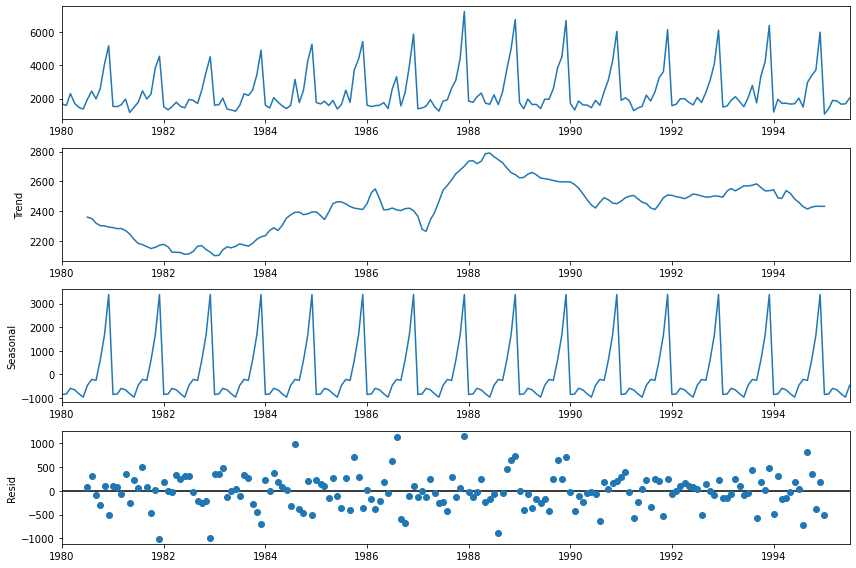

In [38]:
add_decom = seasonal_decompose(df, model='additive')
add_decom.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well. but if we see at residuals there a pattern can be seen in place of random distribution.

In [39]:
trend = add_decom.trend
trend.head(12)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64

In [40]:
add_decom.trend[465:]

Series([], Name: trend, dtype: float64)

In [41]:
seasonality = add_decom.seasonal
seasonality[:10]

YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
1980-05-01   -824.416154
1980-06-01   -967.434011
1980-07-01   -465.502265
1980-08-01   -214.332821
1980-09-01   -254.677265
1980-10-01    599.769957
Name: seasonal, dtype: float64

In [42]:
residual = add_decom.resid
residual.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290
1980-11-01    109.891154
1980-12-01   -501.775513
Name: resid, dtype: float64

In [43]:
df[:12]

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
1980-06-01       1377
1980-07-01       1966
1980-08-01       2453
1980-09-01       1984
1980-10-01       2596
1980-11-01       4087
1980-12-01       5179

### De-Seasonalized Time Series

In [44]:
deseasonalized_ts = trend + residual
deseasonalized_ts[:20]

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2431.502265
1980-08-01    2667.332821
1980-09-01    2238.677265
1980-10-01    1996.230043
1980-11-01    2411.932821
1980-12-01    1792.016154
1981-01-01    2384.260599
1981-02-01    2353.350678
1981-03-01    2225.356630
1981-04-01    2634.490559
1981-05-01    1994.416154
1981-06-01    2447.434011
1981-07-01    2246.502265
1981-08-01    2686.332821
dtype: float64

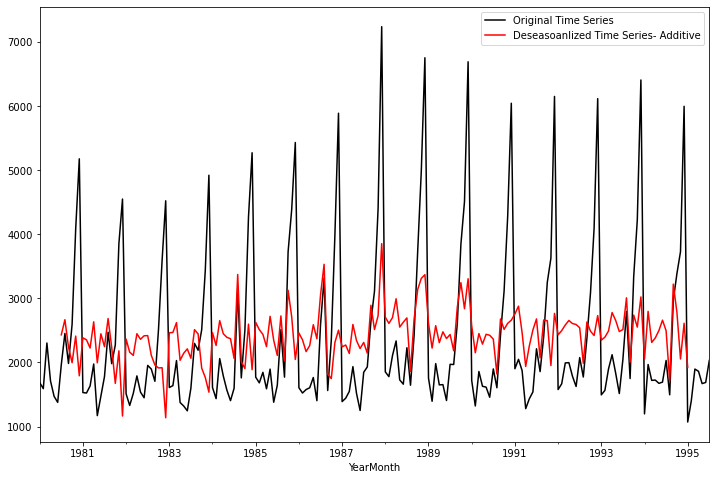

In [45]:
df.plot(color='black')
deseasonalized_ts.plot(color='red');
plt.legend(['Original Time Series', 'Deseasoanlized Time Series- Additive']);

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

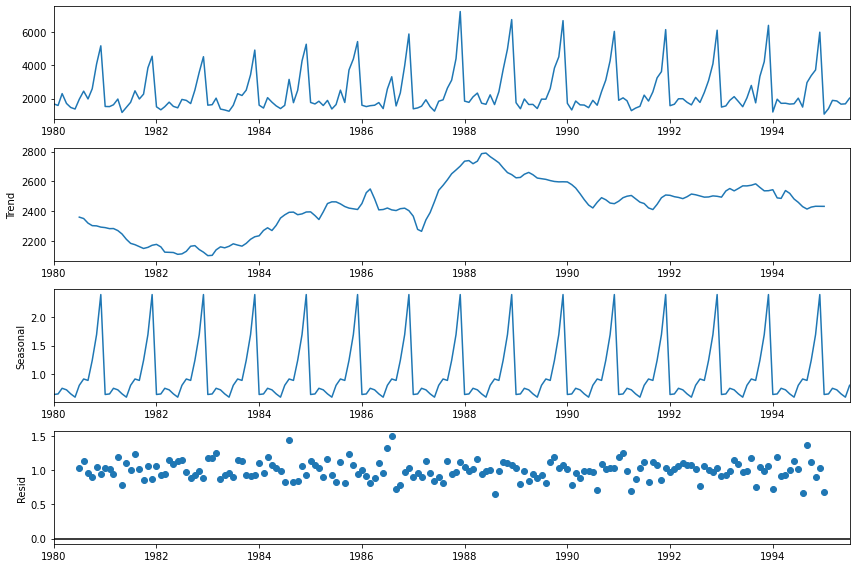

In [47]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [48]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [49]:
deseasonalized_ts = trend + residual
deseasonalized_ts[:20]

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2361.695896
1980-08-01    2352.468741
1980-09-01    2321.497620
1980-10-01    2304.490847
1980-11-01    2303.092089
1980-12-01    2294.738436
1981-01-01    2291.402960
1981-02-01    2284.470100
1981-03-01    2285.068883
1981-04-01    2271.733254
1981-05-01    2248.288028
1981-06-01    2212.858846
1981-07-01    2185.757455
1981-08-01    2177.069825
dtype: float64

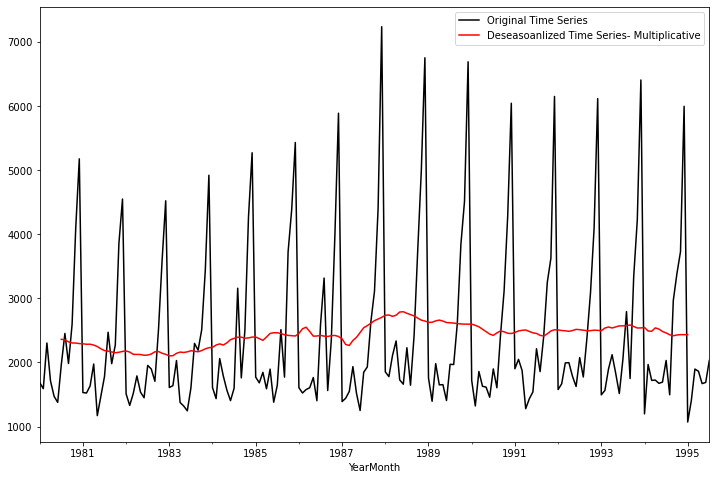

In [50]:
df.plot(color='black')
deseasonalized_ts.plot(color='red');
plt.legend(['Original Time Series', 'Deseasoanlized Time Series- Multiplicative']);

Above Multiplicative De-seasonalized Time series Trend & residual components can be clearly seen

# 3. Split the data into training and test. The test data should start in 1991.

# Train - Test Split & Plot

In [51]:
train = df[df.index.year < 1991] 
test = df[df.index.year >= 1991]

In [52]:
train.shape, test.shape

((132, 1), (55, 1))

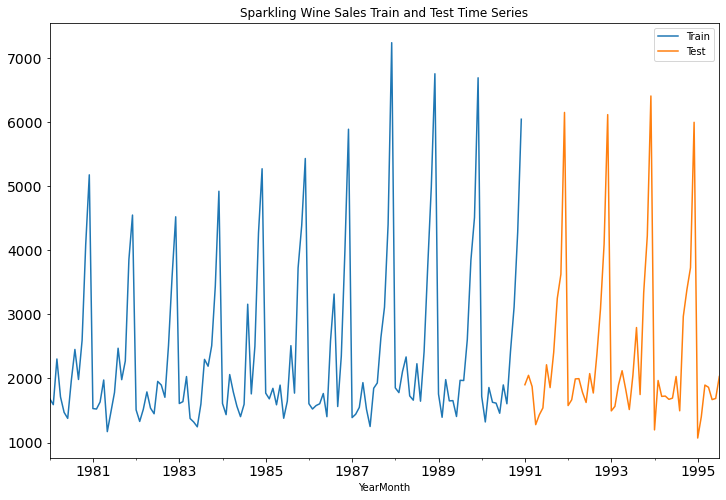

In [53]:
train['Sparkling'].plot(legend = True, label = 'Train', fontsize =14)
test['Sparkling'].plot(legend = True,label = 'Test', fontsize = 14)
plt.title('Sparkling Wine Sales Train and Test Time Series');

**Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.**

# 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

# Building different models and comparing the accuracy metrics.

##  Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [54]:
train_time = [i+1 for i in range(len(train))] # 1 to 132
test_time = [i+133 for i in range(len(test))] # 133 to 187
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [55]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [56]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [57]:
LinearRegression_train.head()

Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

In [58]:
LinearRegression_train.tail()

Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

In [59]:
LinearRegression_test.head()

Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

In [60]:
LinearRegression_test.tail()

Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

Now that our training and test data has been modified, let us go ahead use Linear Regression to build the model on the training data and test the model on the test data.

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [63]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [64]:
LinearRegression_test.head()

Sparkling  time    RegOnTime
YearMonth                               
1991-01-01       1902   133  2791.652093
1991-02-01       2049   134  2797.484752
1991-03-01       1874   135  2803.317410
1991-04-01       1279   136  2809.150069
1991-05-01       1432   137  2814.982727

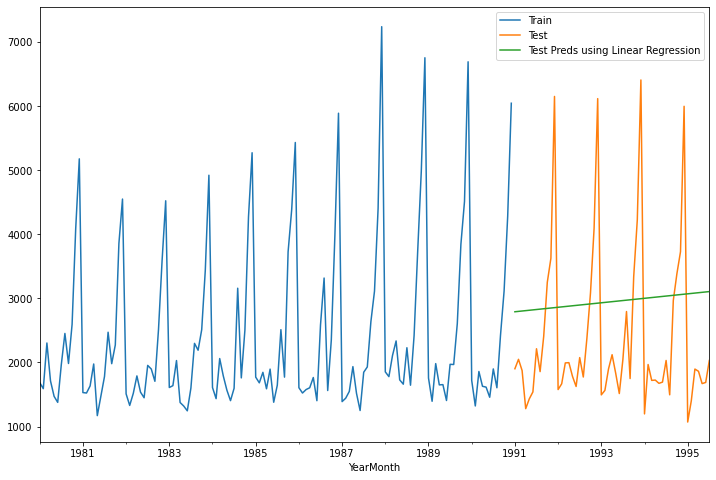

In [65]:
train['Sparkling'].plot(legend = True, label = 'Train')
test['Sparkling'].plot(legend = True, label = 'Test')
LinearRegression_test['RegOnTime'].plot(legend = True, 
                                        label = 'Test Preds using Linear Regression');

## Accuracy metrics for Linear Regression

In [66]:
# from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse 

we can also use sklearn.metrics mse, np.sqrt, mse(squared = false)

## Model Evaluation

In [67]:
## Test Data - RMSE

rmse_model1_test = rmse(test['Sparkling'],test_predictions_model1)
rmse_model1_test

1389.135174897992

In [68]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},
                         index=['Linear Regression OnTime instance'])
resultsDf

Test RMSE
Linear Regression OnTime instance  1389.135175

# Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [69]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [70]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1] # taking the last value from train data
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

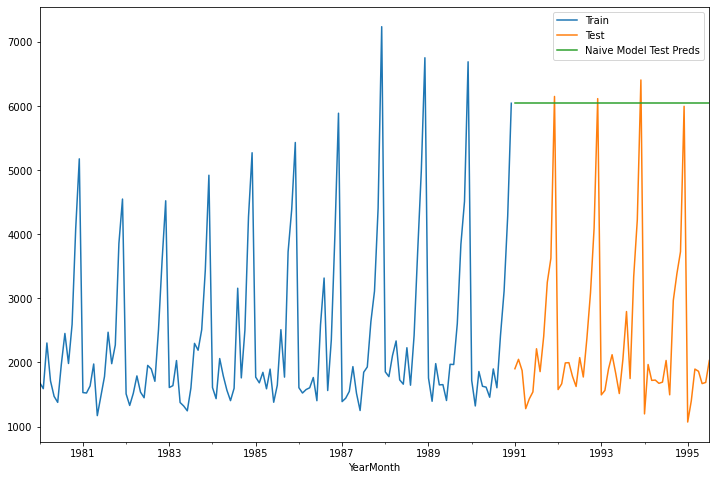

In [71]:
train['Sparkling'].plot(legend = True, label = 'Train')
test['Sparkling'].plot(legend = True, label = 'Test')
NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds');

## Model Evaluation- Naive Approach

In [72]:
## Test Data - RMSE

rmse_model2_test=rmse(test['Sparkling'],NaiveModel_test['naive'])
rmse_model2_test

3864.2793518443914

In [73]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression OnTime instance  1389.135175
NaiveModel                         3864.279352

# Model 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values

In [74]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [75]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

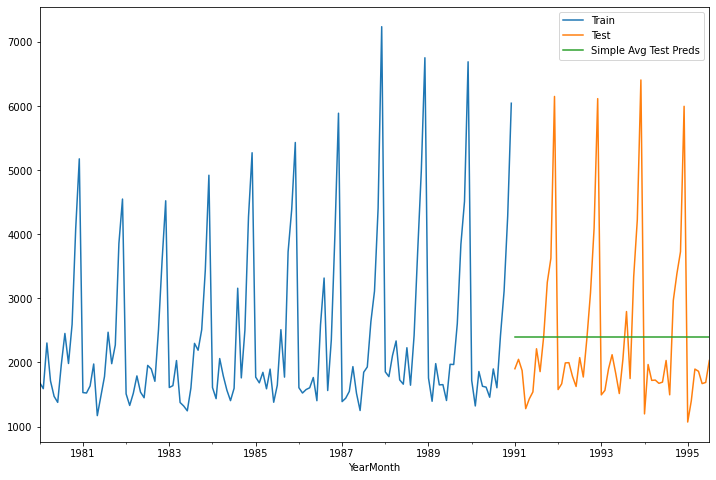

In [76]:
train['Sparkling'].plot(legend = True, label = 'Train')
test['Sparkling'].plot(legend = True, label = 'Test')
SimpleAverage_test['mean_forecast'].plot(legend=True,
                                         label= 'Simple Avg Test Preds');

## Model Evaluation - Simple Average Approach

In [77]:
## Test Data - RMSE 

rmse_model3_test = rmse(test['Sparkling'], 
                        SimpleAverage_test['mean_forecast'])
rmse_model3_test

1275.0818036965309

In [78]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression OnTime instance  1389.135175
NaiveModel                         3864.279352
SimpleAverageModel                 1275.081804

# Model 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [79]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

## Trailing moving averages

In [80]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(20)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
1980-06-01       1377      1424.0     1716.00  1690.166667          NaN
1980-07-01       1966      1671.5     1631.50  1736.833333          NaN
1980-08-01       2453      2209.5     1816.75  1880.500000          NaN
1980-09-01       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-01       2596      2290.0     2249.75  1974.500000  1939.333333
1980-11-01       4087      3341.5     2780.00  2410.500000  2216.666667
1980-12-01       5179      4633.0     3461.50  3044.166667  2536.111111
1981-01-01       1530      3354.5     3348.00  2971.500000  2515.888889
1981-02-01       1523      1526.5     3079.75  2816.500000  2521.666667
1981-03-01       1633      1578.0     2466.25  2758.000000  2550.111111
1981-04-01       1976      1804.5     1665.50  2654.666667  2551.222222
1981-05-01       1170      1573.0     1575.50  2168.500000  2408.666667
1981-06-01       1480      1325.0     1564.75  1552.000000  2352.666667
1981-07-01       1781      1630.5     1601.75  1593.833333  2262.111111
1981-08-01       2472      2126.5     1725.75  1752.000000  2082.666667

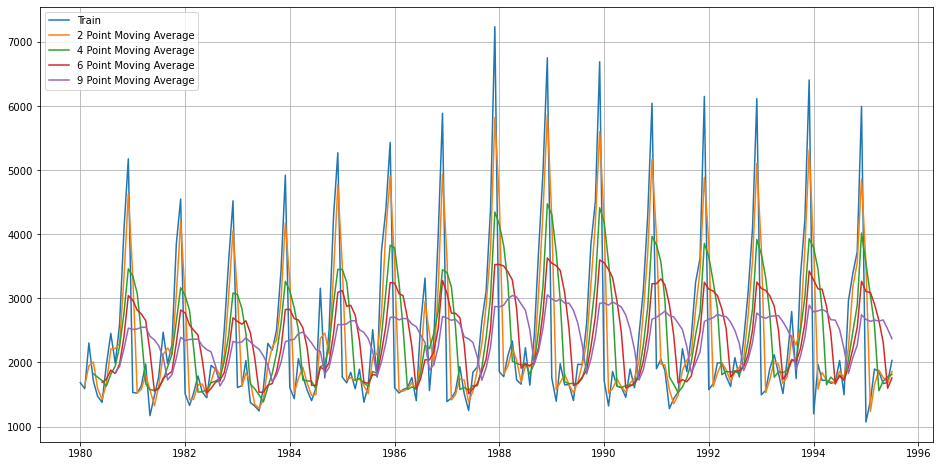

In [81]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [82]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[df.index.year >= 1991]

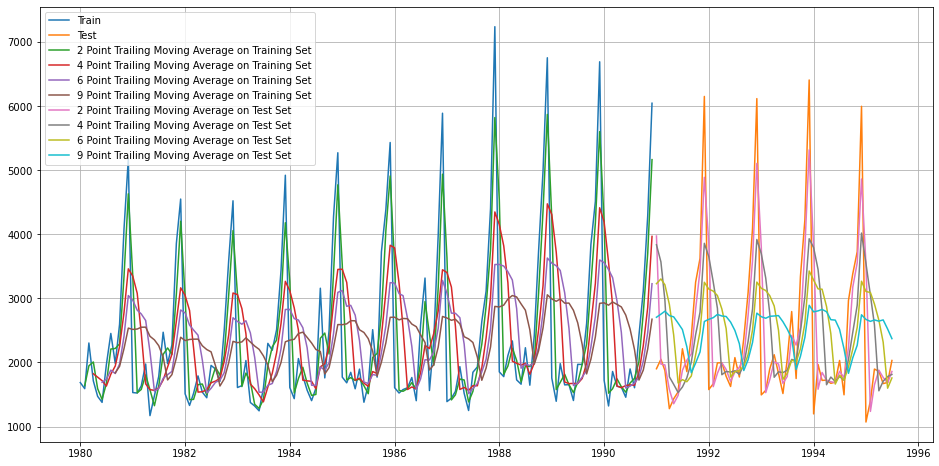

In [83]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

## Model Evaluation --Moving Average(MA)

In [84]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = rmse(test['Sparkling'],
                          trailing_MovingAverage_test['Trailing_2'])
rmse_model4_test_2

813.4006839972983

In [85]:
## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = rmse(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
rmse_model4_test_4

1156.589694081071

In [86]:
## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = rmse(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
rmse_model4_test_6

1283.9274280129855

In [87]:
## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = rmse(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
rmse_model4_test_9

1346.2783154241804

In [88]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_4,rmse_model4_test_6, rmse_model4_test_9]}, index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression OnTime instance  1389.135175
NaiveModel                         3864.279352
SimpleAverageModel                 1275.081804
2pointTrailingMovingAverage         813.400684
4pointTrailingMovingAverage        1156.589694
6pointTrailingMovingAverage        1283.927428
9pointTrailingMovingAverage        1346.278315

Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

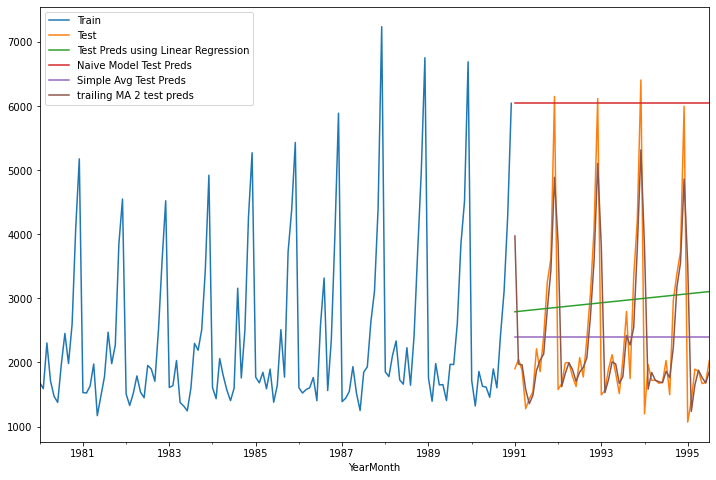

In [89]:
train['Sparkling'].plot(legend = True, label = 'Train')

test['Sparkling'].plot(legend = True, label = 'Test')

LinearRegression_test['RegOnTime'].plot(legend = True, label = 'Test Preds using Linear Regression')

NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds')

SimpleAverage_test['mean_forecast'].plot(legend=True,
                                         label= 'Simple Avg Test Preds')

trailing_MovingAverage_test['Trailing_2'].plot(legend=True,
                                              label ='trailing MA 2 test preds');

# Model 5: Simple Exponential Smoothing

In [90]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [91]:
SES_train = train.copy()
SES_test = test.copy()

In [92]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [93]:
model_SES_autofit = model_SES.fit()

In [94]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7901027902044,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2403.790103
1991-02-01       2049  2403.790103
1991-03-01       1874  2403.790103
1991-04-01       1279  2403.790103
1991-05-01       1432  2403.790103

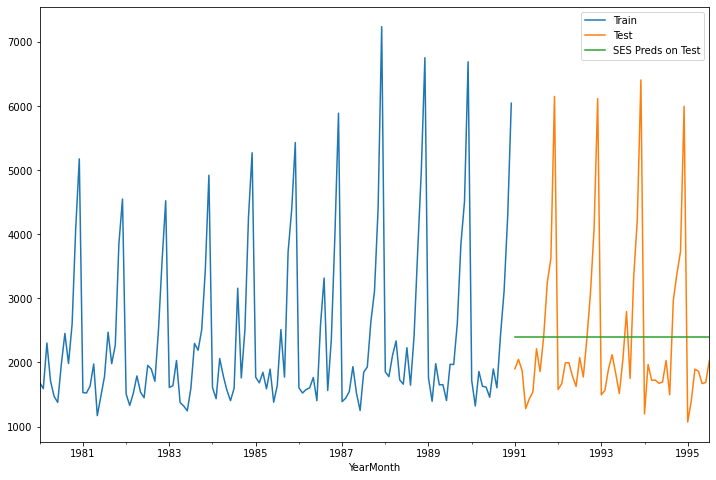

In [96]:
SES_train['Sparkling'].plot(legend=True, label = 'Train')
SES_test['Sparkling'].plot(legend=True, label = 'Test')
SES_test['predict'].plot(legend=True, label = 'SES Preds on Test');

#  Model Evaluation for Simple Exponential Smoothing

In [97]:
## Test Data

rmse_model5_test_1 = rmse(SES_test['Sparkling'],SES_test['predict'])
rmse_model5_test_1

1275.0818393557483

In [98]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.00,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression OnTime instance      1389.135175
NaiveModel                             3864.279352
SimpleAverageModel                     1275.081804
2pointTrailingMovingAverage             813.400684
4pointTrailingMovingAverage            1156.589694
6pointTrailingMovingAverage            1283.927428
9pointTrailingMovingAverage            1346.278315
Alpha=0.00,SimpleExponentialSmoothing  1275.081839

Setting different alpha values:

Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [99]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [100]:
for i in np.arange(0.0,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,
                                      optimized=False,use_brute=True)
    
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = rmse(SES_train['Sparkling'],
                               SES_train['predict',i])
    
    rmse_model5_test_i = rmse(SES_test['Sparkling'],
                              SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,
                                      'Train RMSE': rmse_model5_train_i,'Test RMSE':rmse_model5_test_i}, 
                                     ignore_index=True)

In [101]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
1           0.1  1333.873836  1375.393398
0           0.0  1483.667178  1460.954675
2           0.2  1356.042987  1595.206839
3           0.3  1359.511747  1935.507132
4           0.4  1352.588879  2311.919615
5           0.5  1344.004369  2666.351413
6           0.6  1338.805381  2979.204388
7           0.7  1338.844308  3249.944092
8           0.8  1344.462091  3483.801006
9           0.9  1355.723518  3686.794285

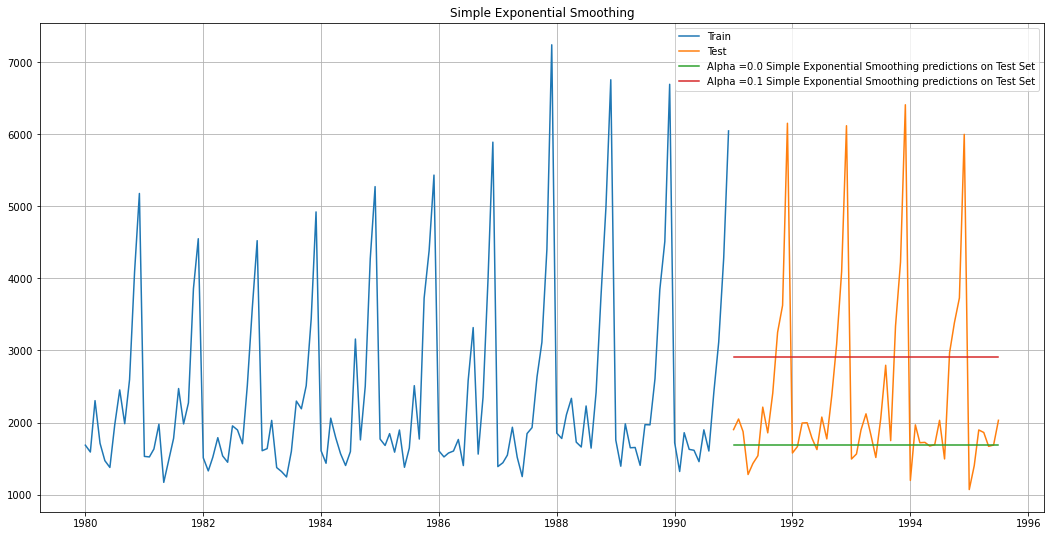

In [102]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict',0.0], label='Alpha =0.0 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.title("Simple Exponential Smoothing")


plt.legend(loc='best')
plt.grid();

In [103]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],
 ascending=True).values[0][2]]}
                           ,index = ['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression OnTime instance      1389.135175
NaiveModel                             3864.279352
SimpleAverageModel                     1275.081804
2pointTrailingMovingAverage             813.400684
4pointTrailingMovingAverage            1156.589694
6pointTrailingMovingAverage            1283.927428
9pointTrailingMovingAverage            1346.278315
Alpha=0.00,SimpleExponentialSmoothing  1275.081839
Alpha=0.1,SimpleExponentialSmoothing   1375.393398

# Model 6: Double Exponential Smoothing (Holt's Model)

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [104]:
DES_train = train.copy()
DES_test = test.copy()

In [105]:
model_DES = Holt(DES_train['Sparkling'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [106]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [107]:
for i in np.arange(0.0,1.1,0.1):
    for j in np.arange(0.0,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,
                                            smoothing_slope=j, 
                                            optimized=False, 
                                            use_brute=True)
        
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test))
        
        rmse_model6_train = rmse(DES_train['Sparkling'],
                                 DES_train['predict',i,j])
        
        rmse_model6_test = rmse(DES_test['Sparkling'],
                                DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,
                                          'Beta Values':j,
                                          'Train RMSE': rmse_model6_train,
                                          'Test RMSE': rmse_model6_test}, ignore_index=True)

In [108]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
12           0.1          0.1  1382.520870  1778.564670
66           0.6          0.0  1353.081728  2004.479267
77           0.7          0.0  1349.696523  2024.922482
55           0.5          0.0  1363.627617  2046.410581
88           0.8          0.0  1352.968870  2080.557083

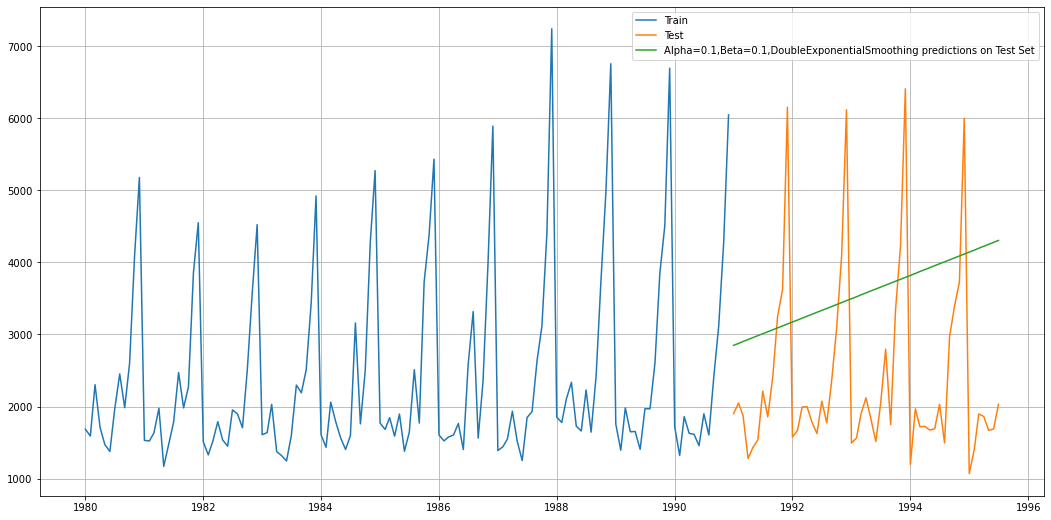

In [109]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1],
         label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [110]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
Linear Regression OnTime instance              1389.135175
NaiveModel                                     3864.279352
SimpleAverageModel                             1275.081804
2pointTrailingMovingAverage                     813.400684
4pointTrailingMovingAverage                    1156.589694
6pointTrailingMovingAverage                    1283.927428
9pointTrailingMovingAverage                    1346.278315
Alpha=0.00,SimpleExponentialSmoothing          1275.081839
Alpha=0.1,SimpleExponentialSmoothing           1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1778.564670

# Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

We will calculate Three parameters  𝛼 ,  𝛽  and  𝛾   in this model. Level, Trend and Seasonality are accounted for in this model.

In [111]:
TES_train = train.copy()
TES_test = test.copy()

In [112]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],
                                 trend='additive',
                                 seasonal='additive')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [113]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [114]:
model_TES_autofit.params

{'smoothing_level': 0.08620807620652111,
 'smoothing_slope': 2.5318127264805285e-10,
 'smoothing_seasonal': 0.4763318881970767,
 'damping_slope': nan,
 'initial_level': 1684.856831619659,
 'initial_slope': 0.006547258914785458,
 'initial_seasons': array([  39.18349969,  -37.78583681,  464.67331107,  206.1306033 ,
        -141.07452355, -157.23487797,  338.09368962,  856.86721657,
         403.58906901,  971.28204491, 2401.59300214, 3426.63695382]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [115]:
model_TES_autofit.params['smoothing_slope'].round(15)

2.53181e-10

In [116]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test)).round(0)

TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902        1532.0
1991-02-01       2049        1241.0
1991-03-01       1874        1727.0
1991-04-01       1279        1584.0
1991-05-01       1432        1494.0

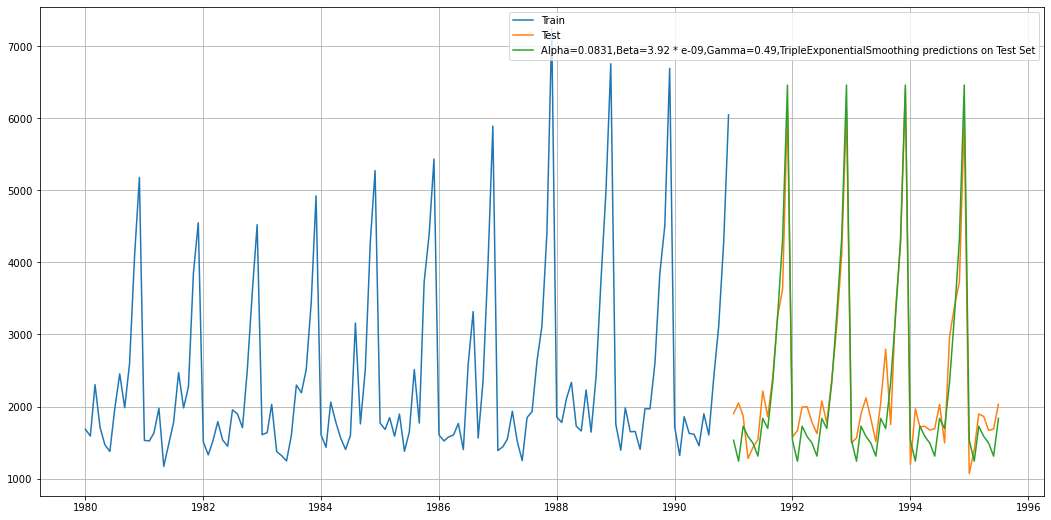

In [117]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0831,Beta=3.92 * e-09,Gamma=0.49,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [118]:
## Test Data

rmse_model6_test_1 = rmse(TES_test['Sparkling'],
                          TES_test['auto_predict'])
rmse_model6_test_1

362.7405032902622

In [119]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.0831,Beta=3.92 * e-09,Gamma=0.49,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
Linear Regression OnTime instance                   1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.00,SimpleExponentialSmoothing               1275.081839
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.0831,Beta=3.92 * e-09,Gamma=0.49,Triple...   362.740503

In [120]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [121]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_slope=j,
                                                  smoothing_seasonal=k,
                                                  optimized=False,
                                                  use_brute=True)
            
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test))
        
            rmse_model8_train = rmse(TES_train['Sparkling'],
                                     TES_train['predict',i,j,k])
            
            rmse_model8_test = rmse(TES_test['Sparkling'],
                                    TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,
                                                  'Beta Values':j,
                                                  'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test},ignore_index=True)

In [122]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
0             0.1          0.1           0.1     425.094821  5.200117e+02
1             0.1          0.1           0.2     401.522221  6.398682e+02
2             0.1          0.1           0.3     387.303366  7.427758e+02
3             0.1          0.1           0.4     380.278116  8.077458e+02
4             0.1          0.1           0.5     378.710709  8.409400e+02
..            ...          ...           ...            ...           ...
895           1.0          0.9           0.6    5381.151390  4.382630e+05
896           1.0          0.9           0.7   17690.511192  7.489772e+05
897           1.0          0.9           0.8   63845.285615  9.450218e+05
898           1.0          0.9           0.9  217063.923868  3.742122e+06
899           1.0          0.9           1.0  661893.786748  2.370114e+07

[900 rows x 5 columns]

In [123]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
85            0.1          0.9           0.6  438.525019  338.458417
129           0.2          0.4           1.0  483.673805  338.840640
100           0.2          0.2           0.1  452.507225  343.715412
30            0.1          0.4           0.1  447.900255  346.302722
271           0.4          0.1           0.2  441.242988  365.192054

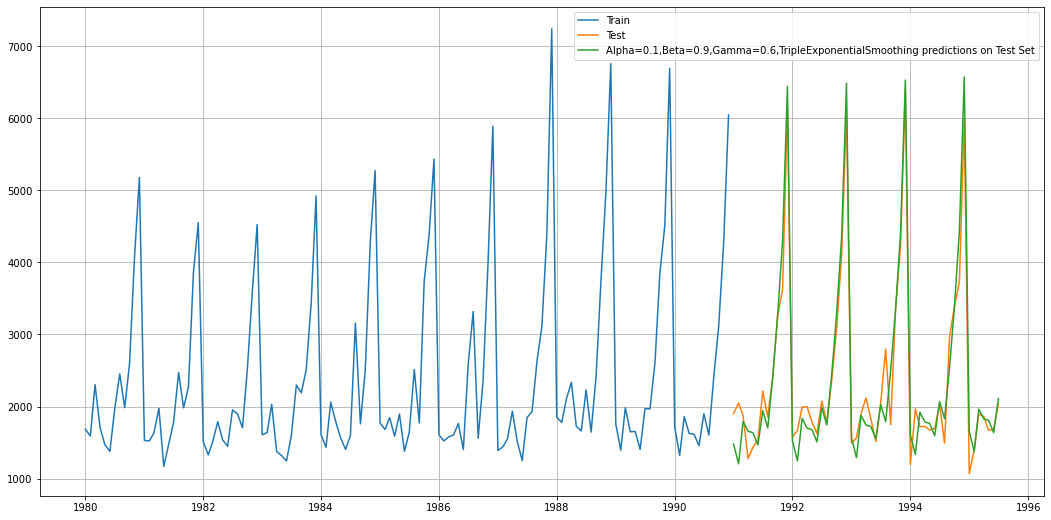

In [124]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.9, 0.6], label='Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [125]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf


Test RMSE
Linear Regression OnTime instance                   1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.00,SimpleExponentialSmoothing               1275.081839
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.0831,Beta=3.92 * e-09,Gamma=0.49,Triple...   362.740503
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417

In [126]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
Alpha=0.0831,Beta=3.92 * e-09,Gamma=0.49,Triple...   362.740503
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
Alpha=0.00,SimpleExponentialSmoothing               1275.081839
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Linear Regression OnTime instance                   1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
NaiveModel                                          3864.279352

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. 

## We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.1,  𝛽  = 0.9 and  𝛾  = 0.6.

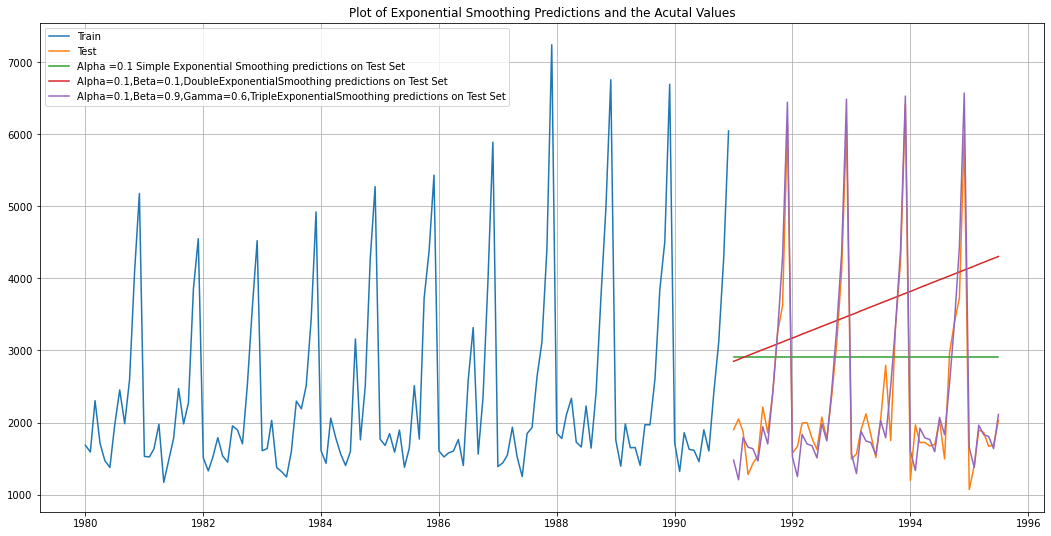

In [127]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.9, 0.6], label='Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

The two models to be built on the whole data are the following:

Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing\

Alpha=0.08,Beta=3.92 * e-09,Gamma=0.49,TripleExponentialSmoothing

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [128]:

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [129]:
#let's first plot the Time Series

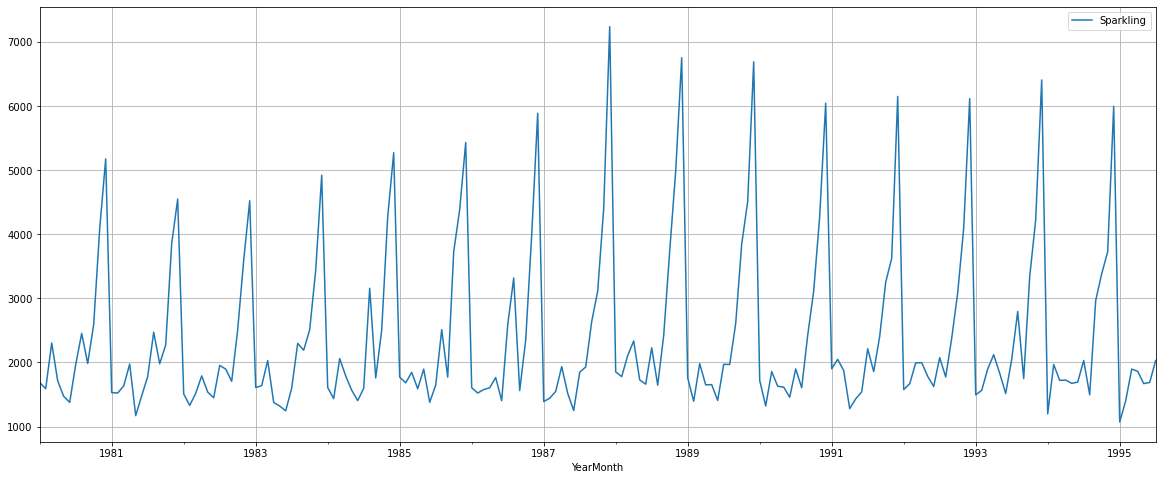

In [130]:
df.plot()
plt.grid();

We can see that there is a slight mixed (Upward & Downward) trend with a seasonal pattern associated as well.

## Decompose the Time Series and plot the different components.

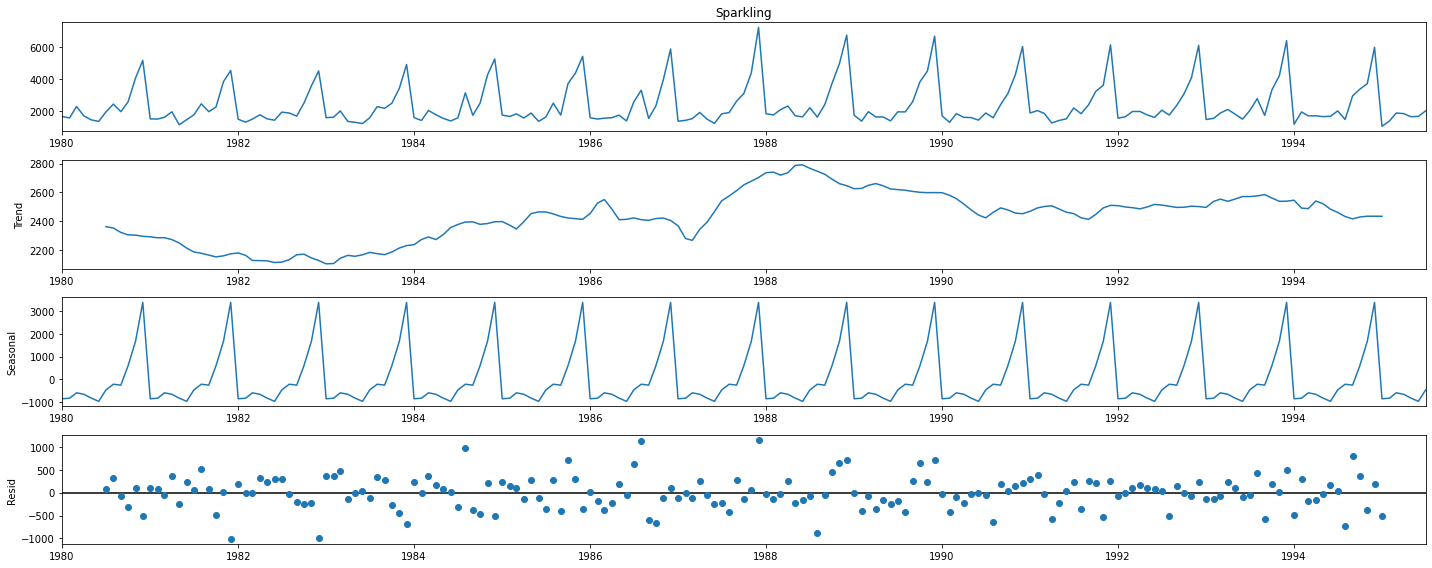

In [131]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

We see that the residuals are not randomly located around 0 from the plot of the residuals in the decomposition

In [132]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


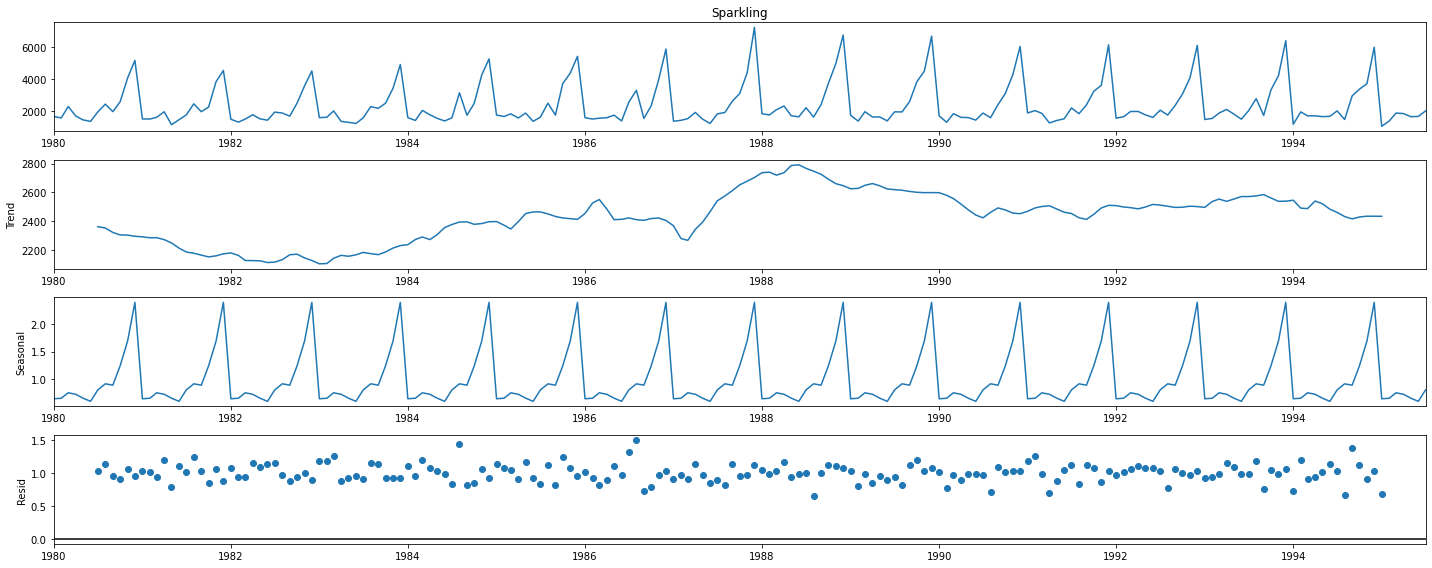

In [133]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

**We can see that the residuals are located Near 1 So series Will be multiplicative series**

In [134]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

### Check for stationarity of the whole Time Series data.

In [135]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

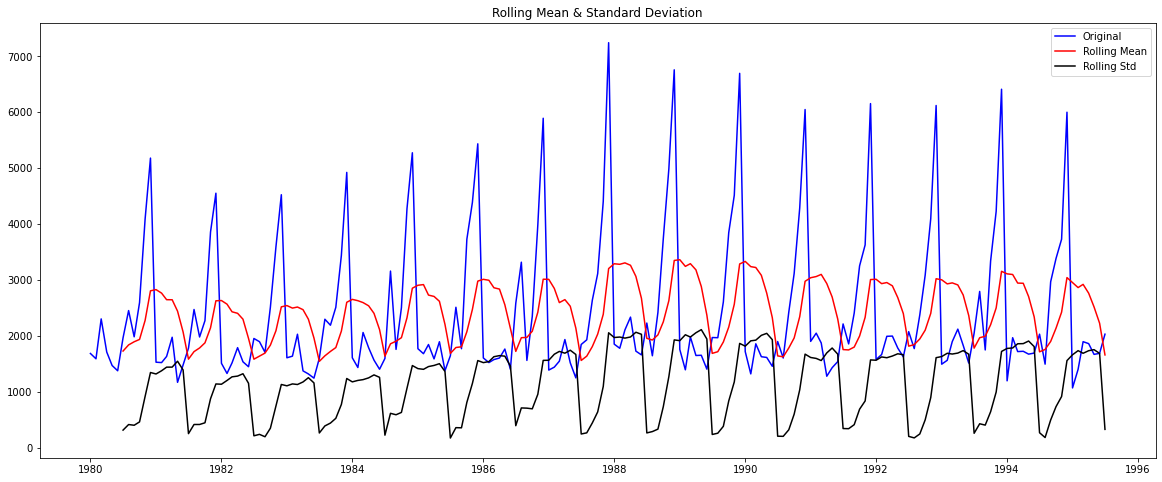

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [136]:
test_stationarity(df['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

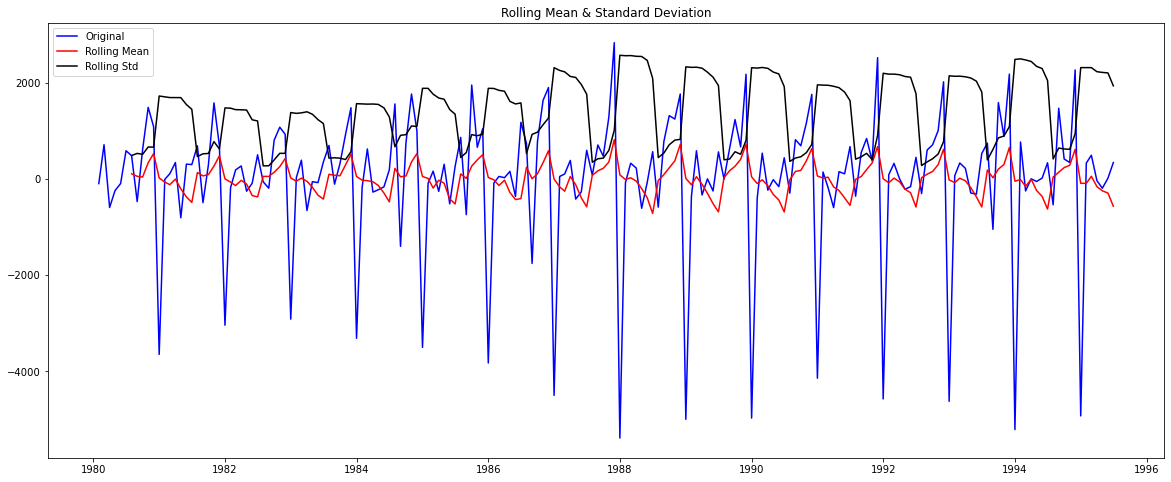

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [137]:
test_stationarity(df['Sparkling'].diff().dropna())

We see that at significance level 𝛼  = 0.05 the Time Series is  stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [138]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

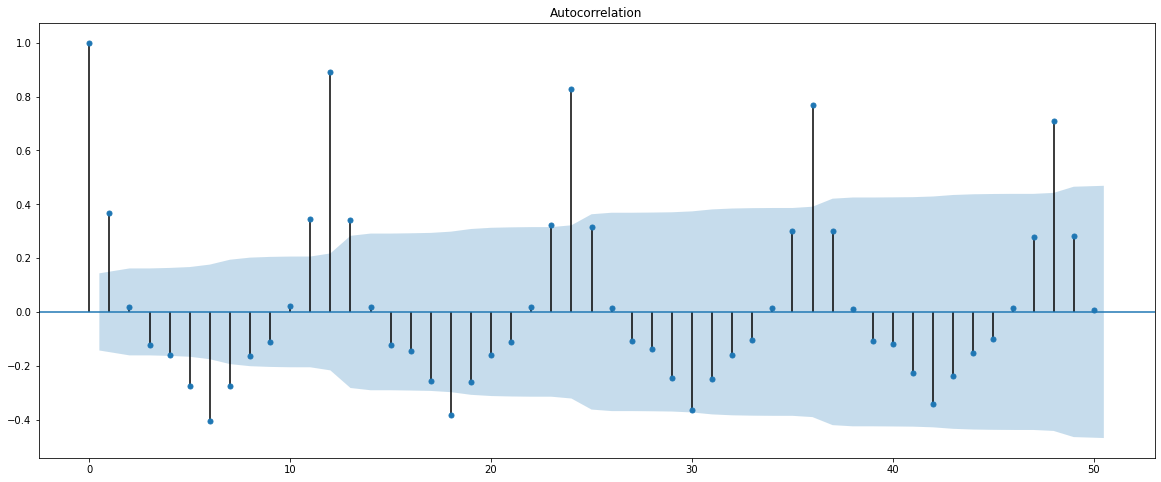

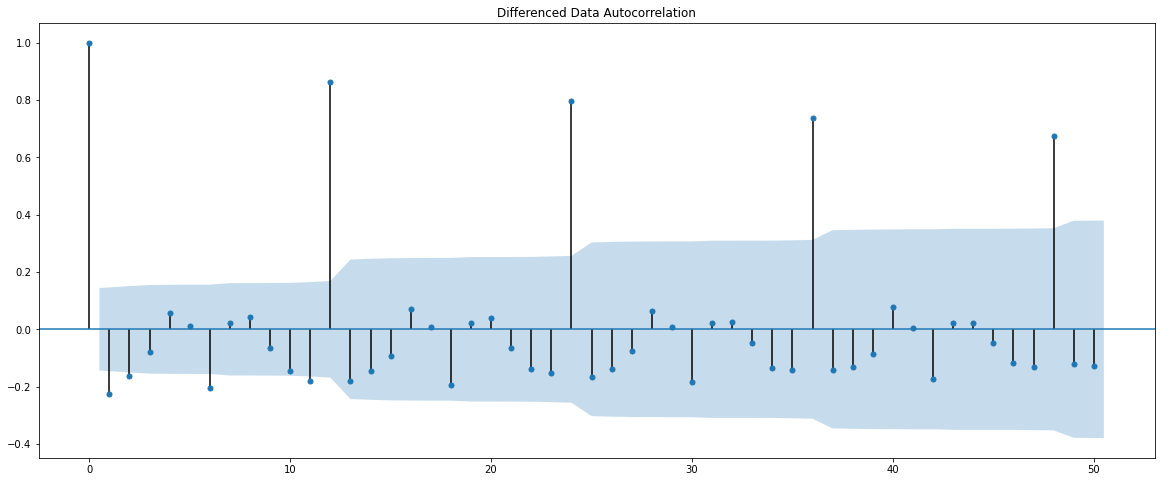

In [139]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


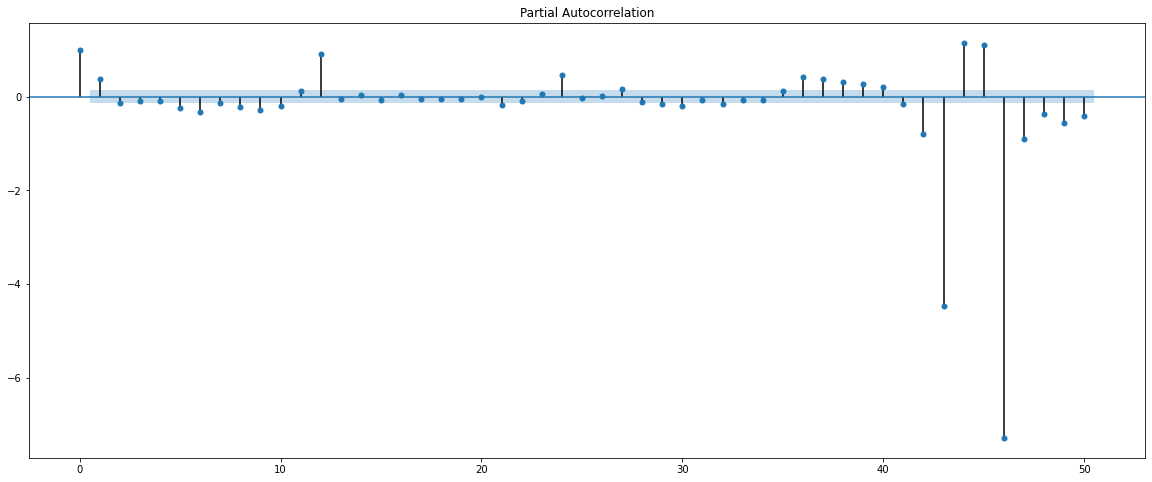

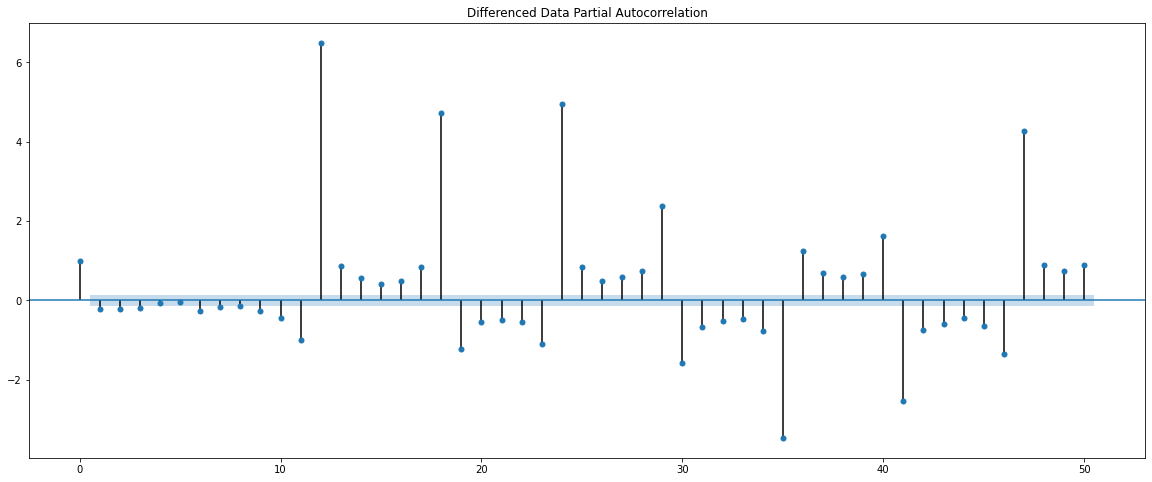

In [140]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

In [141]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [142]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [143]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


###  Check for stationarity of the Training Data Time Series.

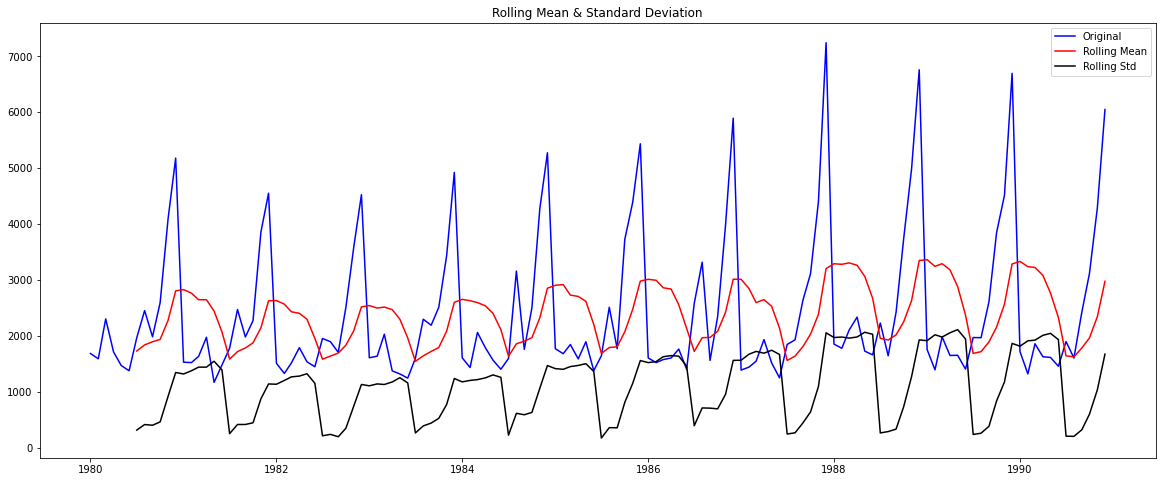

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [144]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at  𝛼  = 0.05.

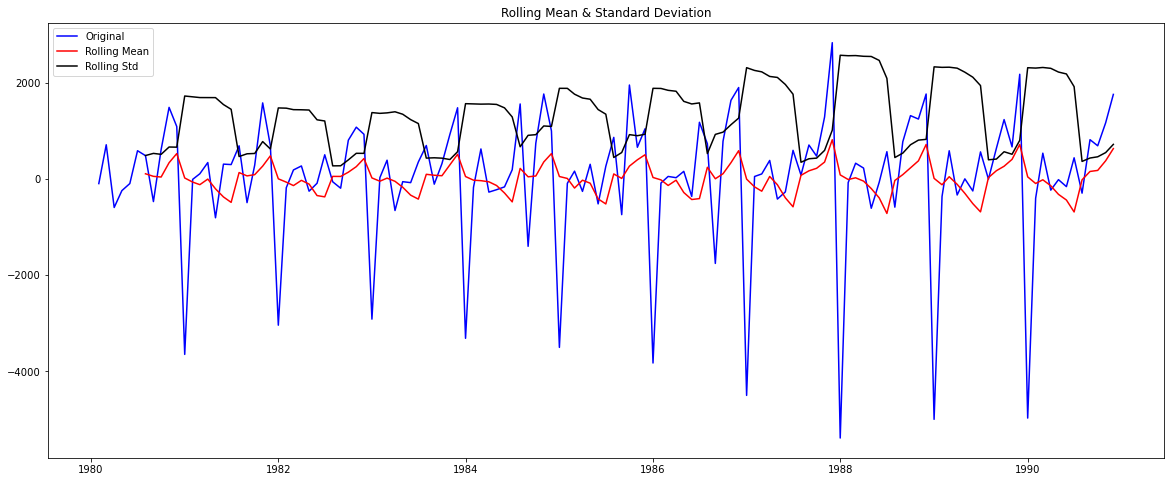

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [145]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [147]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [148]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [149]:
from statsmodels.tsa.arima_model import ARIMA

In [150]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'],
                        order=param).fit()
    
    print(f'ARIMA{param} - AIC:{ARIMA_model.aic}')
    
    ARIMA_AIC=ARIMA_AIC.append({'param':param, 
                                'AIC': ARIMA_model.aic},
                               ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.90643726763


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 2) - AIC:2232.7830976842542
ARIMA(1, 1, 0) - AIC:2268.5280605652692


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1) - AIC:2235.013945349695


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 2) - AIC:2233.5976471196977


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 0) - AIC:2262.0356005526905


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 1) - AIC:2232.3604898830527


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 2) - AIC:2210.6178944529283


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [151]:
ARIMA_AIC

param          AIC
0  (0, 1, 0)  2269.582796
1  (0, 1, 1)  2264.906437
2  (0, 1, 2)  2232.783098
3  (1, 1, 0)  2268.528061
4  (1, 1, 1)  2235.013945
5  (1, 1, 2)  2233.597647
6  (2, 1, 0)  2262.035601
7  (2, 1, 1)  2232.360490
8  (2, 1, 2)  2210.617894

In [152]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.617894
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035601
1  (0, 1, 1)  2264.906437
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [153]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

results_auto_ARIMA.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.606
Date:                Sun, 23 May 2021   AIC                           2210.618
Time:                        16:15:30   BIC                           2227.869
Sample:                    02-01-1980   HQIC                          2217.628
                         - 12-01-1990                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5857      0.517     10.814      0.000       4.573       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.5601      0.074     -7.617      0.000      -0.704      -0.416
ma.L1.D.Sparkling    -1.9980      0.042    -47.168      0.000      -2.081      -1.915
ma.L2.D.Sparkling     0.9980      0.042     23.548      0.000       0.915       1.081
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1336           -0.7073j            1.3362           -0.0888
AR.2            1.1336           +0.7073j            1.3362            0.0888
MA.1            1.0006           +0.0000j            1.0006            0.0000
MA.2            1.0014           +0.0000j            1.0014            0.0000
-----------------------------------------------------------------------------
"""

### Predict on the Test Set using this model and evaluate the model.

In [154]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

predicted_auto_ARIMA is a tuple consisting of the predicted mean values, standard deviation of predictions and the confidence interval of the predictions

In [155]:
# from sklearn.metrics import  mean_squared_error
from statsmodels.tools.eval_measures import rmse
RMSE_autoarima = rmse(test['Sparkling'],
                      predicted_auto_ARIMA[0])
print(RMSE_autoarima)

1374.6782304197766


In [156]:
resultsDf1 = pd.DataFrame({'Test RMSE': [RMSE_autoarima]}
                           ,index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,resultsDf1])

resultsDf

Test RMSE
Linear Regression OnTime instance                   1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.00,SimpleExponentialSmoothing               1275.081839
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.0831,Beta=3.92 * e-09,Gamma=0.49,Triple...   362.740503
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
ARIMA(2,1,2)                                        1374.678230

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

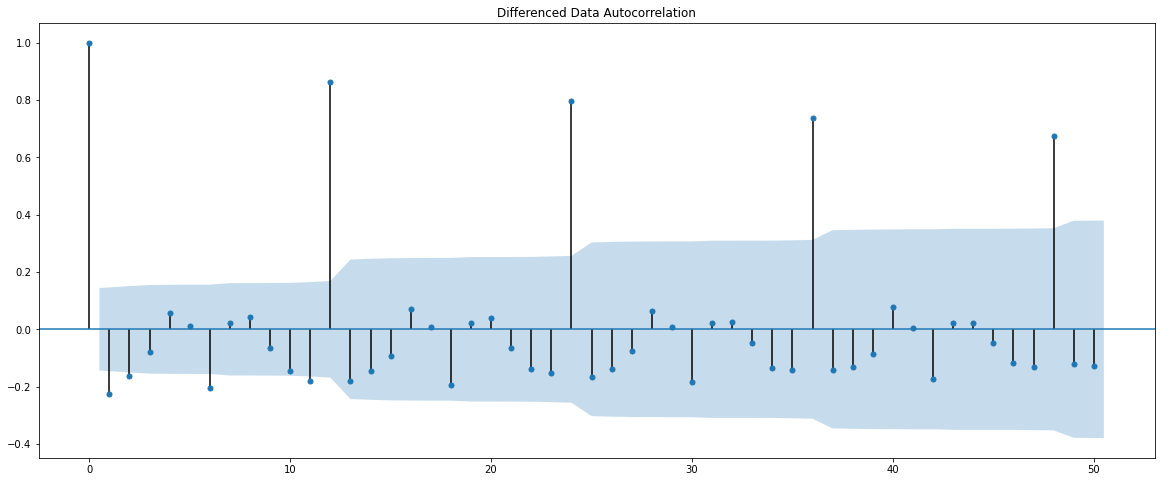

In [157]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of  12. We will run our auto SARIMA models by setting seasonality both as 6 and 12

## Setting the seasonality as 12 for the second iteration of the auto SARIMA model

In [158]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

In [159]:
import itertools
p = q = range(0,3)

d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print(f'Model: {pdq[i]}{model_pdq[i]}')

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [160]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [161]:

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model =SARIMAX(train['Sparkling'],
                                            order=param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
        
        SARIMA_AIC = SARIMA_AIC.append({'param':param,
                                        'seasonal':param_seasonal ,
                                        'AIC': results_SARIMA.aic},
                                       ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844394


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640239197
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.99053013736


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735940396


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054160641658


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898054509742
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505994


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649611723


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957496547


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881788903


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.097302231198


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319692749798


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954602962


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245086849107


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683739868984
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410102201005


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.2897618826482


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1657.6640310399084


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.032633222533


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1667385019784


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1603192504685


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.965477449441


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438801471264


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215627829438
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339929493


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476313956


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279328061


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592981546


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894412245214


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080430449


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356135286496


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412074662393
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.9340491981757


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.355897915976


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.098135299764


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466634733


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.5403490318308


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248864645157


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.616160702699


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142235558319


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069967756119
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450414826

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708322439457


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291422522877


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799270418


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871793618622


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.584246900653


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4214753285785


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5152893584473


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1556.0802541117177
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.43834352802


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039701985


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646065936774


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.935734670376


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702288658511


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.240346522495


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344986260249


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191737641554


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613187796


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209496877735


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423407962981


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1759.756927777182


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911247329934


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.988831315164


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235062248468


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1596419979512


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1571.9780199258714


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.869804983861


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1891.546366044013


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1664.2974982547166


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931082715


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086130086276


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1580.3781821398627


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.0455913154174


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5463976927958


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401301756521


In [162]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1556.080254
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160319
80  (2, 1, 2)  (2, 0, 2, 12)  1557.840130

In [163]:

auto_SARIMA_12 =SARIMAX(train['Sparkling'],
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)

results_auto_SARIMA_12.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 23 May 2021   AIC                           1555.584
Time:                                    16:18:08   BIC                           1574.095
Sample:                                01-01-1980   HQIC                          1563.083
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225     -0.463      0.643      -0.545       0.337
ma.L2         -0.7276      0.154     -4.734      0.000      -1.029      -0.426
ar.S.L12       1.0439      0.014     72.838      0.000       1.016       1.072
ma.S.L12      -0.5550      0.098     -5.663      0.000      -0.747      -0.363
ma.S.L24      -0.1354      0.120     -1.133      0.257      -0.370       0.099
sigma2      1.506e+05   2.03e+04      7.400      0.000    1.11e+05     1.9e+05
===================================================================================
Ljung-Box (Q):                       23.02   Jarque-Bera (JB):                11.72
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             0.36
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predict on the Test Set using SARIMA model and evaluate the model

In [164]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [165]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1327.375384  388.346117     566.230982    2088.519785
1991-02-01  1315.100332  402.011042     527.173168    2103.027496
1991-03-01  1621.588540  402.004648     833.673908    2409.503172
1991-04-01  1598.853714  407.242446     800.673187    2397.034242
1991-05-01  1392.689005  407.972726     593.077156    2192.300855

In [166]:
rmse_autosarima12 = rmse(test['Sparkling'],
                         predicted_auto_SARIMA_12.predicted_mean)
print(rmse_autosarima12)

528.6235236642664


In [167]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_autosarima12]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Linear Regression OnTime instance                   1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.00,SimpleExponentialSmoothing               1275.081839
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.0831,Beta=3.92 * e-09,Gamma=0.49,Triple...   362.740503
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
ARIMA(2,1,2)                                        1374.678230
SARIMA(1,1,2)(2,0,2,12)                              528.623524

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots .

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


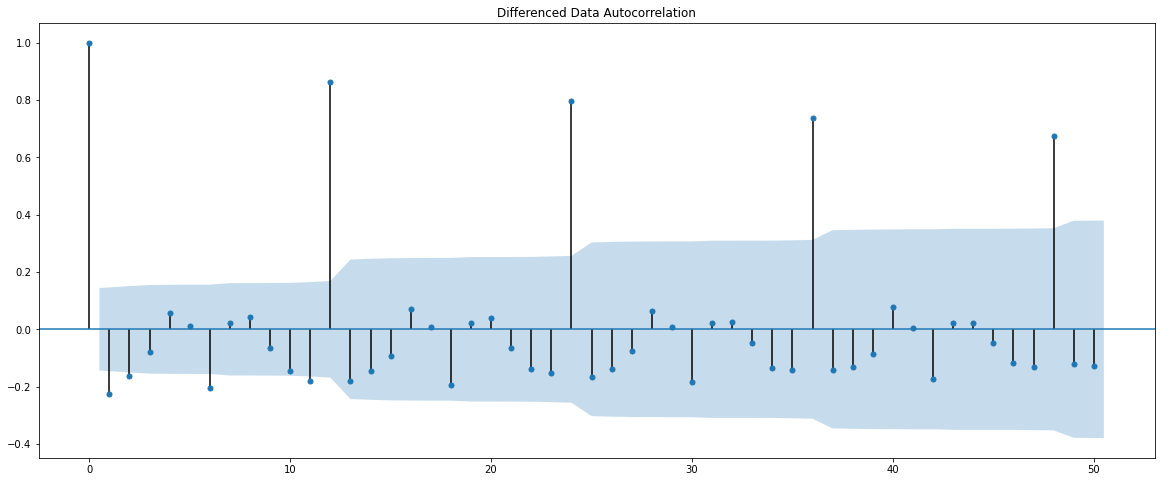

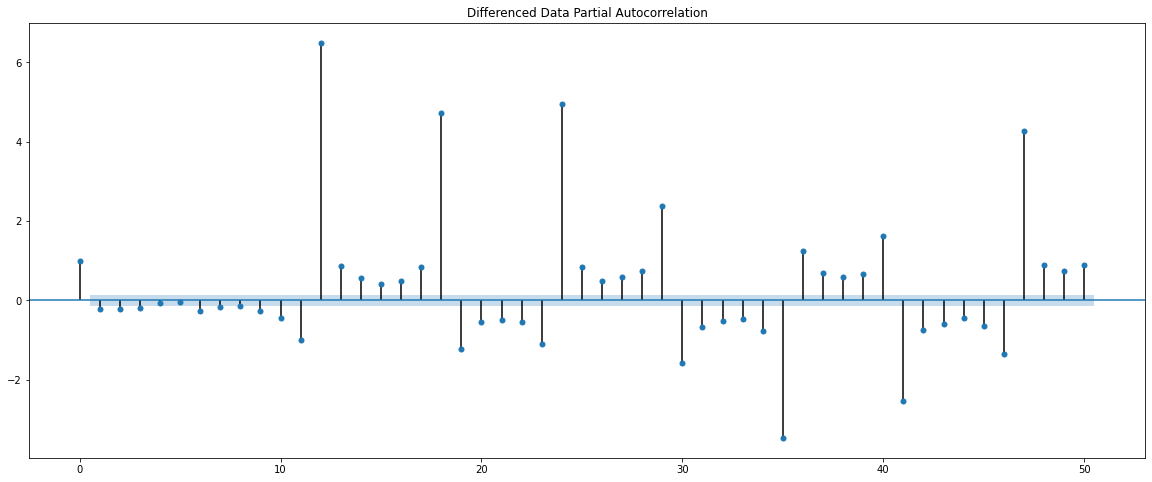

In [168]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [169]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

results_manual_ARIMA.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.121
Date:                Sun, 23 May 2021   AIC                           2228.927
Time:                        16:18:11   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.106
                         - 12-01-1990                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9846      3.643      1.643      0.100      -1.156      13.125
ar.L1.D.Sparkling    -0.4420   5.85e-06  -7.55e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.3079   1.53e-05   2.02e+04      0.000       0.308       0.308
ar.L3.D.Sparkling    -0.2501   1.32e-05  -1.89e+04      0.000      -0.250      -0.250
ma.L1.D.Sparkling    -0.0006      0.020     -0.028      0.978      -0.040       0.039
ma.L2.D.Sparkling    -0.9994      0.020    -49.289      0.000      -1.039      -0.960
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           -0.0000j            1.0000           -0.5000
AR.2            1.1156           -1.6594j            1.9996           -0.1558
AR.3            1.1156           +1.6594j            1.9996            0.1558
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0006           +0.0000j            1.0006            0.5000
-----------------------------------------------------------------------------
"""

## Predict on the Test Set using Manual Arima model and evaluate the model

In [170]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [171]:
from statsmodels.tools.eval_measures import rmse
RMSE_manualarima = rmse(test['Sparkling'],
                        predicted_manual_ARIMA[0])
RMSE_manualarima

1378.9839663387434

In [172]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [RMSE_manualarima]}
                           ,index=['Manual ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Linear Regression OnTime instance                   1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.00,SimpleExponentialSmoothing               1275.081839
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.0831,Beta=3.92 * e-09,Gamma=0.49,Triple...   362.740503
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
ARIMA(2,1,2)                                        1374.678230
SARIMA(1,1,2)(2,0,2,12)                              528.623524
Manual ARIMA(3,1,2)                                 1378.983966

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


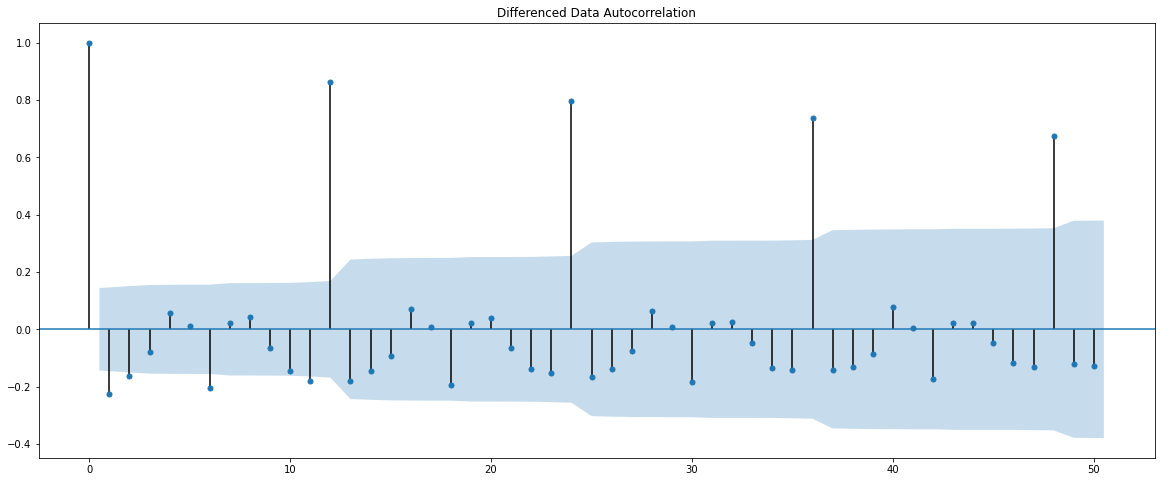

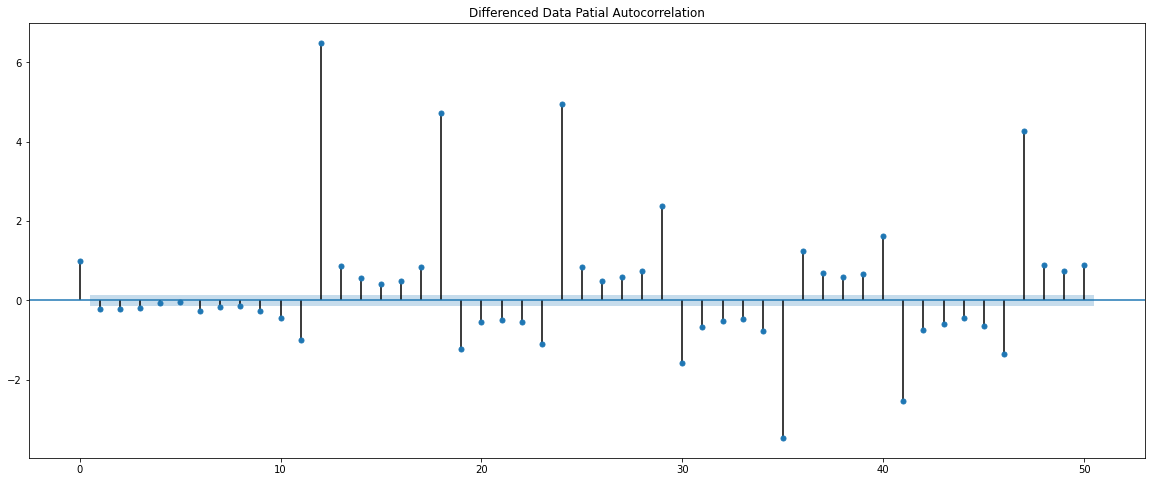

In [173]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

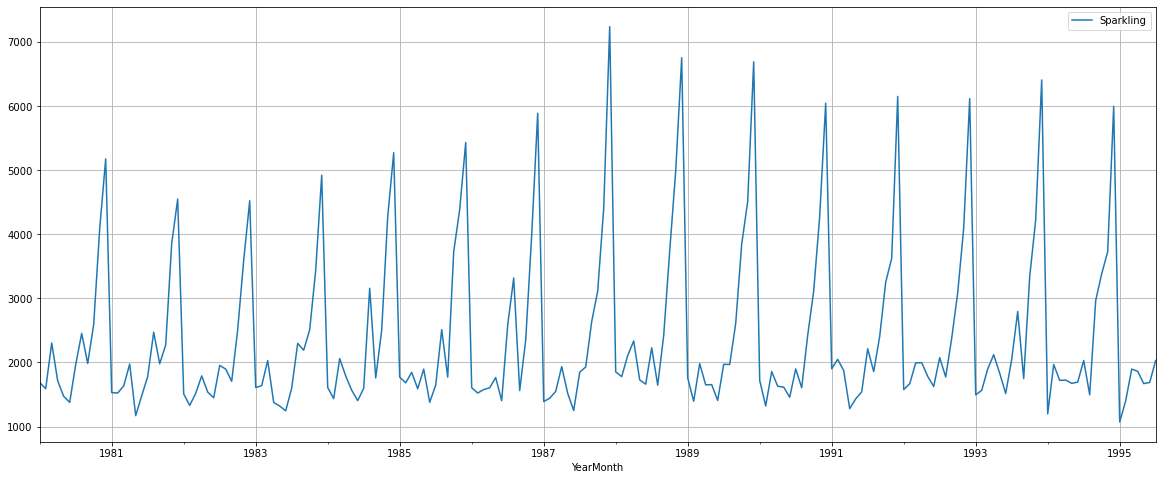

In [174]:
df.plot()
plt.grid();


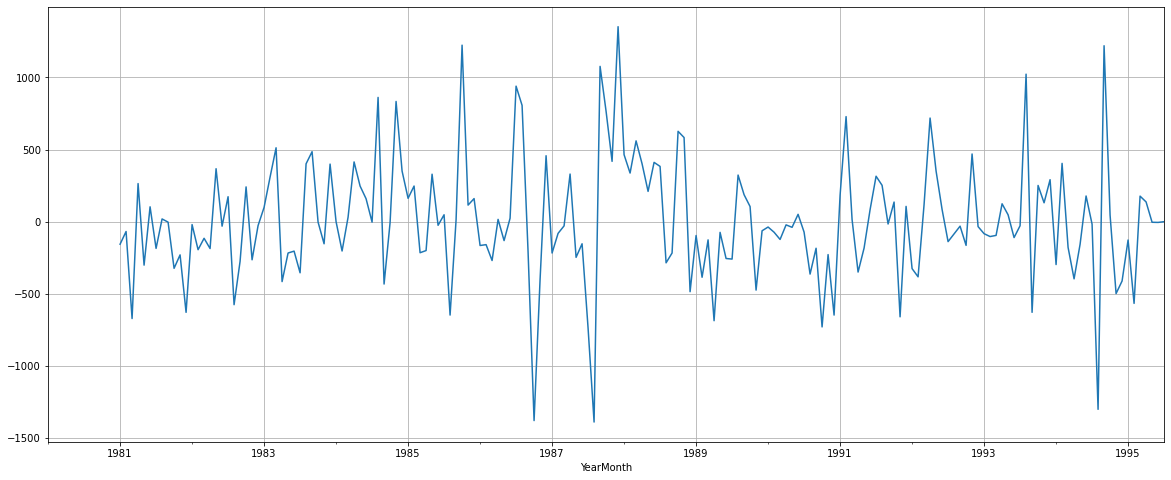

In [175]:
(df['Sparkling']).diff(12).plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

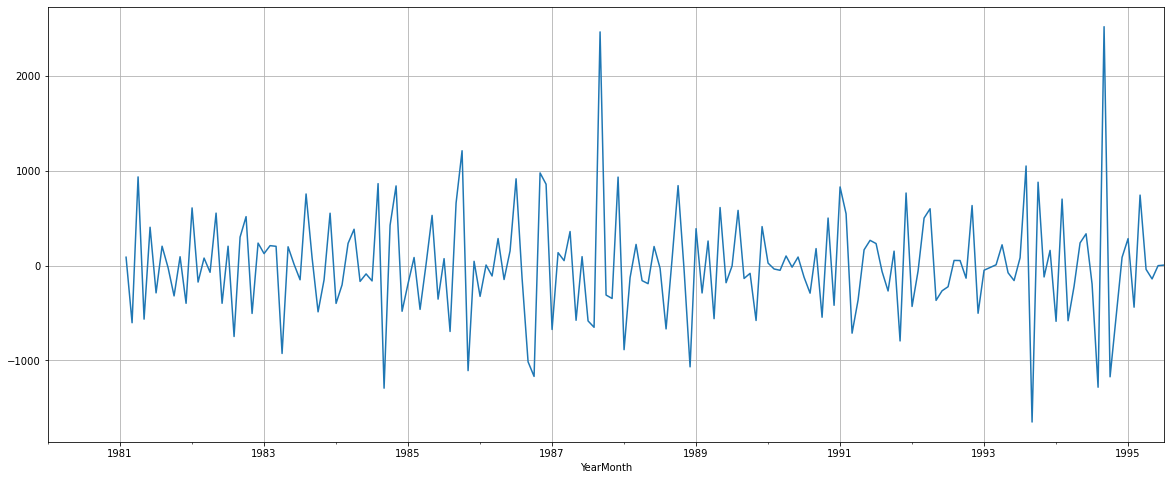

In [176]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

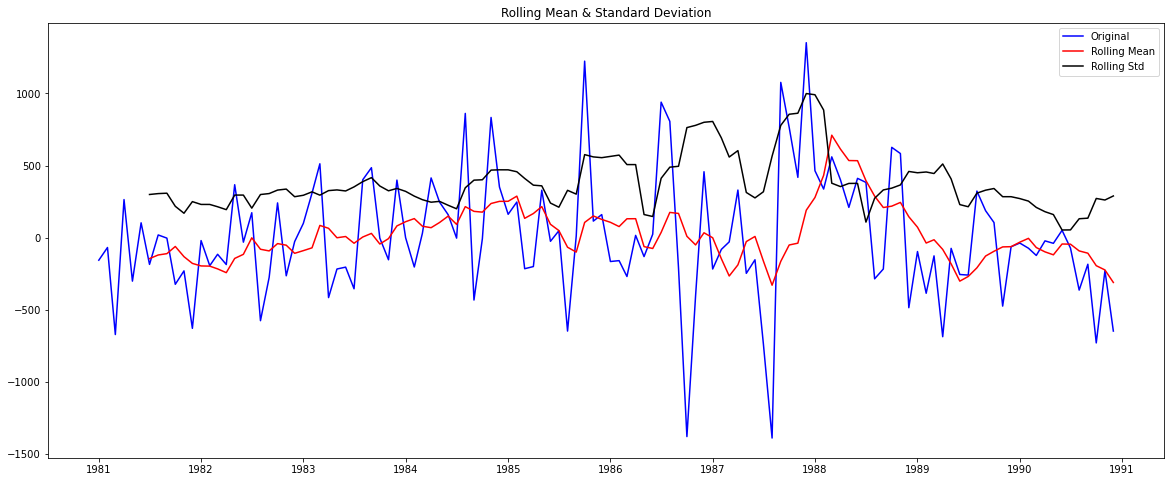

Results of Dickey-Fuller Test:
Test Statistic                  -3.136812
p-value                          0.023946
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [177]:
test_stationarity((train['Sparkling']).diff(12).dropna().dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


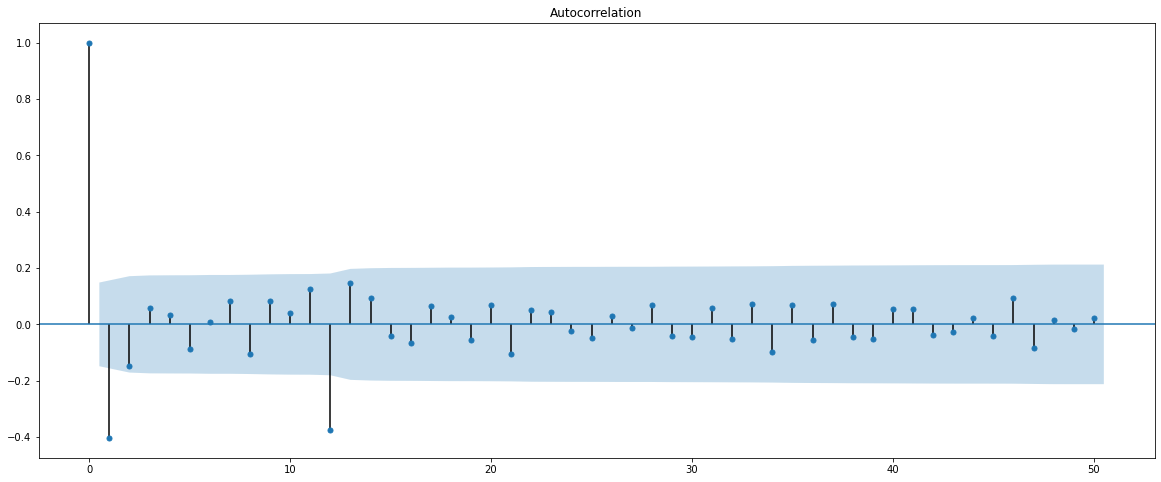

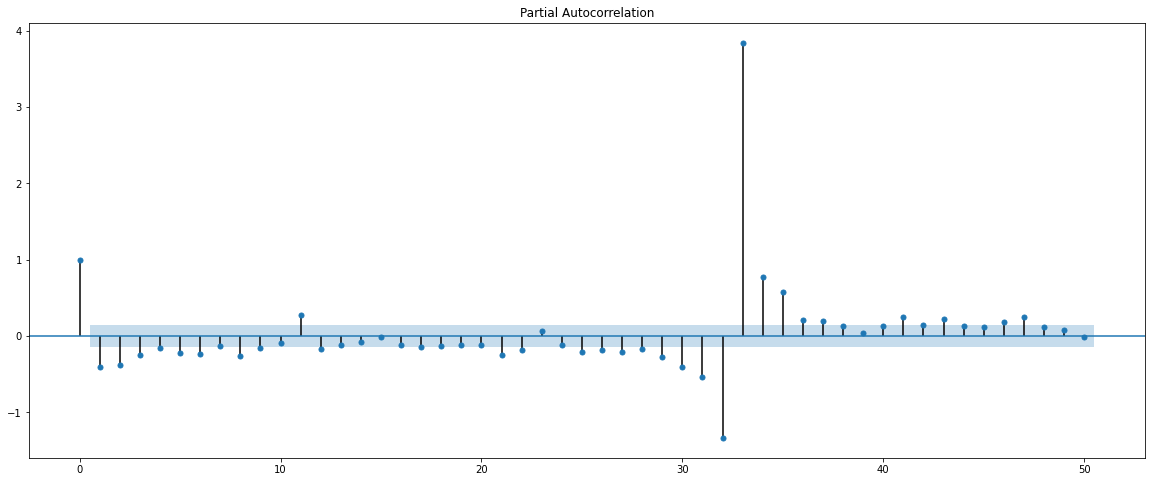

In [178]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=50)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=50);

In [179]:

manual_SARIMA_6 =SARIMAX(train['Sparkling'],
                                order=(1, 1, 2),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
results_manual_SARIMA_6.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(3, 1, [1], 12)   Log Likelihood                -613.167
Date:                              Sun, 23 May 2021   AIC                           1242.334
Time:                                      16:18:23   BIC                           1261.588
Sample:                                  01-01-1980   HQIC                          1250.064
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5743      0.320     -1.795      0.073      -1.201       0.053
ma.L1         -0.1641      0.274     -0.600      0.549      -0.700       0.372
ma.L2         -0.7412      0.207     -3.586      0.000      -1.146      -0.336
ar.S.L12      -0.5371      0.995     -0.540      0.590      -2.488       1.414
ar.S.L24      -0.2611      0.391     -0.667      0.505      -1.028       0.506
ar.S.L36      -0.1228      0.185     -0.663      0.507      -0.486       0.240
ma.S.L12       0.1191      1.003      0.119      0.905      -1.846       2.085
sigma2      1.825e+05   3.06e+04      5.963      0.000    1.23e+05    2.43e+05
===================================================================================
Ljung-Box (Q):                       26.39   Jarque-Bera (JB):                10.80
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.60
Prob(H) (two-sided):                  0.38   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict on the Test Set using SARIMA model and evaluate the model.

In [180]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [181]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1479.772877  427.251916     642.374509    2317.171246
1991-02-01  1431.691511  441.636837     566.099216    2297.283806
1991-03-01  1764.985189  442.272468     898.147081    2631.823297
1991-04-01  1715.420743  445.570258     842.119085    2588.722400
1991-05-01  1543.036200  445.669773     669.539496    2416.532903

In [182]:
rmse_manualsarima6 = rmse(test['Sparkling'],
                          predicted_manual_SARIMA_6.predicted_mean)
print(rmse_manualsarima6)

350.8396326667659


In [183]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_manualsarima6]}
                           ,index=['Manual SARIMA(1,1,2)(3,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf 

Test RMSE
Linear Regression OnTime instance                   1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.00,SimpleExponentialSmoothing               1275.081839
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.0831,Beta=3.92 * e-09,Gamma=0.49,Triple...   362.740503
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
ARIMA(2,1,2)                                        1374.678230
SARIMA(1,1,2)(2,0,2,12)                              528.623524
Manual ARIMA(3,1,2)                                 1378.983966
Manual SARIMA(1,1,2)(3,1,1,12)                       350.839633

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

In [184]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
Manual SARIMA(1,1,2)(3,1,1,12)                       350.839633
Alpha=0.0831,Beta=3.92 * e-09,Gamma=0.49,Triple...   362.740503
SARIMA(1,1,2)(2,0,2,12)                              528.623524
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
Alpha=0.00,SimpleExponentialSmoothing               1275.081839
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
ARIMA(2,1,2)                                        1374.678230
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Manual ARIMA(3,1,2)                                 1378.983966
Linear Regression OnTime instance                   1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
NaiveModel                                          3864.279352

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Predicting for the Next 12 Months from the basic Models

In [185]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
seasonal='additive').fit(smoothing_level=0.1,
smoothing_slope=0.9,smoothing_seasonal=0.6)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [186]:
RMSE_fullmodel1 = rmse(df['Sparkling'],
                       fullmodel1.fittedvalues)

RMSE_fullmodel1

480.2897928123097

In [187]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

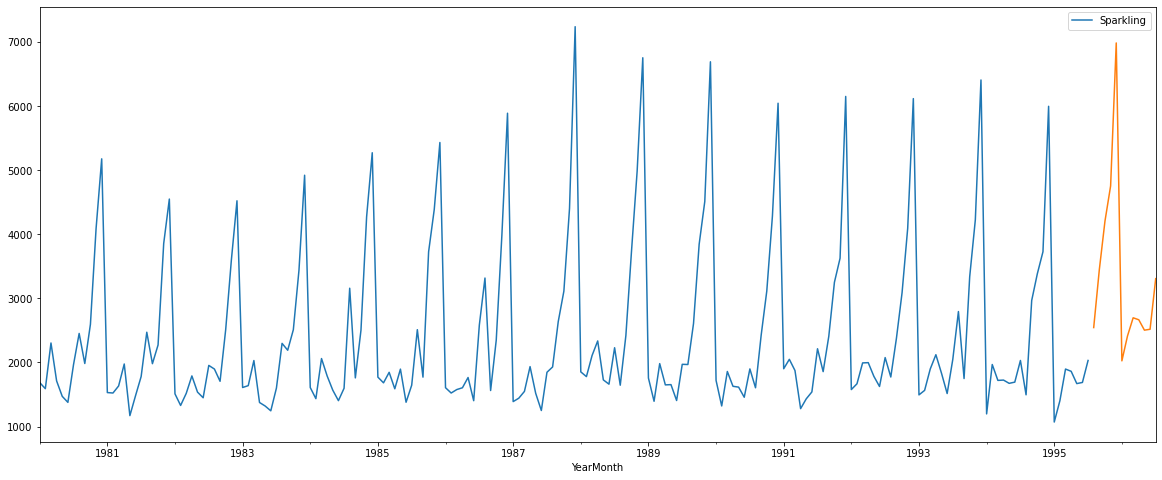

In [188]:
df.plot()
prediction_1.plot();

In [189]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head(12)

lower_CI   prediction     upper_ci
1995-08-01  1600.890630  2544.759210  3488.627790
1995-09-01  2506.602215  3450.470795  4394.339375
1995-10-01  3263.099283  4206.967863  5150.836443
1995-11-01  3811.831806  4755.700386  5699.568966
1995-12-01  6044.324001  6988.192580  7932.061160
1996-01-01  1081.396371  2025.264951  2969.133531
1996-02-01  1471.021351  2414.889931  3358.758511
1996-03-01  1753.525605  2697.394185  3641.262765
1996-04-01  1722.494861  2666.363441  3610.232021
1996-05-01  1560.454261  2504.322841  3448.191421
1996-06-01  1574.309376  2518.177956  3462.046535
1996-07-01  2364.638637  3308.507217  4252.375797

In [190]:
df.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

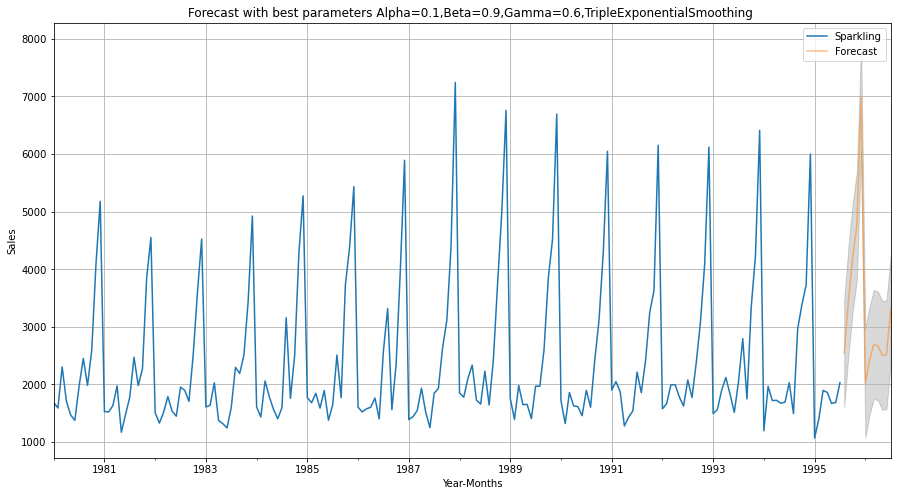

In [206]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.title('Forecast with best parameters Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing ')
plt.show()

### Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.

In [192]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='multiplicative',
                                  seasonal='additive').fit(smoothing_level=0.08,
                                                                 smoothing_slope=(0.00000000392),
                                                                 smoothing_seasonal=0.323)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [193]:
RMSE_fullmodel2 = rmse(df['Sparkling'],fullmodel2.fittedvalues)

RMSE_fullmodel2

364.60934473371987

In [194]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=12)

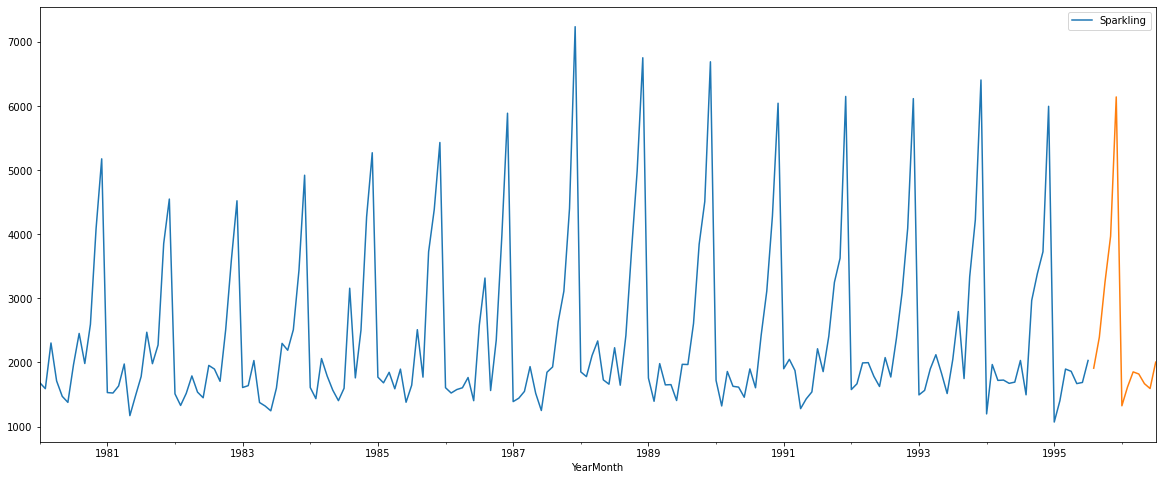

In [195]:
df.plot();
prediction_2.plot();

In [196]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df.head()

lower_CI   prediction     upper_ci
1995-08-01   966.601012  1910.469592  2854.338172
1995-09-01  1449.775088  2393.643668  3337.512248
1995-10-01  2306.372248  3250.240828  4194.109408
1995-11-01  3028.115042  3971.983622  4915.852202
1995-12-01  5201.508267  6145.376847  7089.245427

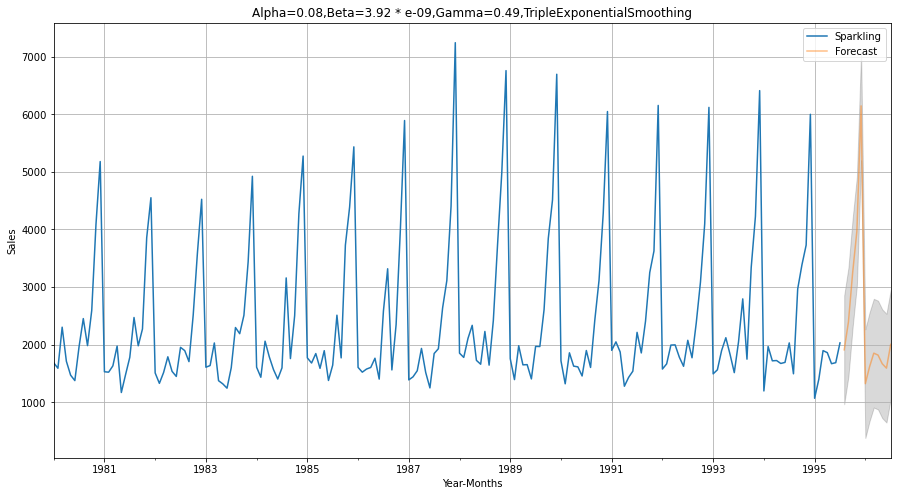

In [197]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("Alpha=0.08,Beta=3.92 * e-09,Gamma=0.49,TripleExponentialSmoothing")
plt.grid()
plt.show()

### Prediction Using Sarima Model

In [208]:
full_data_model = SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(3,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
results_full_data_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(3, 1, [1], 12)   Log Likelihood               -1015.152
Date:                              Sun, 23 May 2021   AIC                           2046.303
Time:                                      16:35:41   BIC                           2069.663
Sample:                                  01-01-1980   HQIC                          2055.796
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6154      0.363     -1.696      0.090      -1.327       0.096
ma.L1         -0.2342      0.329     -0.711      0.477      -0.880       0.411
ma.L2         -0.7032      0.305     -2.309      0.021      -1.300      -0.106
ar.S.L12      -0.5405      0.547     -0.988      0.323      -1.613       0.532
ar.S.L24      -0.2588      0.271     -0.955      0.340      -0.790       0.273
ar.S.L36      -0.1512      0.126     -1.196      0.232      -0.399       0.097
ma.S.L12       0.0129      0.556      0.023      0.981      -1.077       1.102
sigma2       1.59e+05   1.78e+04      8.945      0.000    1.24e+05    1.94e+05
===================================================================================
Ljung-Box (Q):                       21.49   Jarque-Bera (JB):                27.85
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.62
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [209]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [210]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head(12)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1908.369218  398.797615    1126.740255    2689.998181
1995-09-01  2463.009095  403.285988    1672.583083    3253.435107
1995-10-01  3295.398738  403.463366    2504.625072    4086.172405
1995-11-01  3862.586155  404.755859    3069.279249    4655.893061
1995-12-01  6121.557973  404.787579    5328.188896    6914.927050
1996-01-01  1197.765922  405.376261     403.243050    1992.288794
1996-02-01  1587.263281  405.539883     792.419716    2382.106845
1996-03-01  1836.925782  405.933384    1041.310969    2632.540594
1996-04-01  1846.611139  406.173406    1050.525891    2642.696387
1996-05-01  1679.367676  406.503004     882.636429    2476.098923
1996-06-01  1636.296936  406.775490     839.031625    2433.562247
1996-07-01  2013.259805  407.082115    1215.393521    2811.126090

In [211]:
rmse_full_data = rmse(df['Sparkling'],results_full_data_model.fittedvalues)
rmse_full_data

555.8587432151195

In [212]:
pred_full_manual_SARIMA_data = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',periods=12,freq='M'))

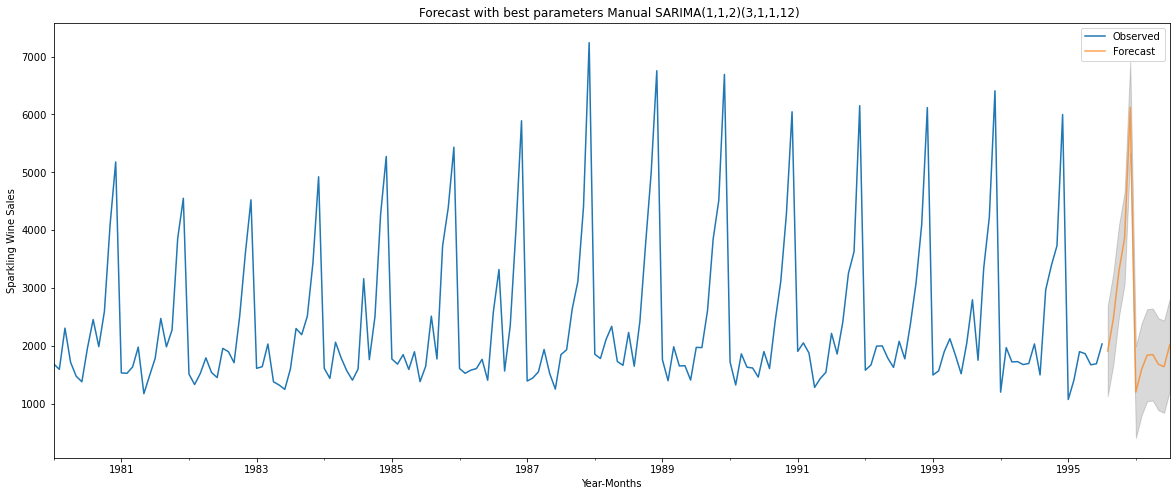

In [215]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')

pred_full_manual_SARIMA_data['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.fill_between(pred_full_manual_SARIMA_data.index, 
                  pred_full_manual_SARIMA_data['mean_ci_lower'], 
                  pred_full_manual_SARIMA_data['mean_ci_upper'], 
                  color='k', alpha=.15)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.title('Forecast with best parameters Manual SARIMA(1,1,2)(3,1,1,12) ')
plt.show()

In [216]:
df.tail(12)


Sparkling
YearMonth            
1994-08-01       1495
1994-09-01       2968
1994-10-01       3385
1994-11-01       3729
1994-12-01       5999
1995-01-01       1070
1995-02-01       1402
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031